# Лабораторная работа 4.1 Построение и оценка модели для прогнозирования оттока клиентов

**Тема.** Интерпретация результатов модели для принятия бизнес-решений

**Курс.** Python для анализа данных

**Специальность.** Бизнес-информатика

### Цель работы:
Научиться применять модели машинного обучения (регрессию и классификацию) для решения реальных бизнес-задач, а также интерпретировать полученные результаты для формирования практических рекомендаций и принятия управленческих решений.

---

## Машинное обучение как инструмент бизнес-аналитика

В современном бизнесе данные — это стратегический актив. Способность предсказывать будущее поведение клиентов, оценивать риски и оптимизировать процессы напрямую влияет на прибыльность компании. Машинное обучение (ML) предоставляет для этого мощный инструментарий.

**Сквозной бизнес-кейс.** На протяжении всей этой работы мы будем решать одну из самых классических и важных задач — **прогнозирование оттока клиентов (Customer Churn)** на примере телеком-оператора.

**Почему это важно для бизнеса?**
- **Прямые финансовые потери.** Потерянный клиент — это потерянный доход.
- **Высокая стоимость привлечения.** Привлечь нового клиента в 5-7 раз дороже, чем удержать существующего.

Наша цель — не просто построить модель, которая предсказывает отток, а понять, **как использовать её результаты для реальных действий**: кому из клиентов предложить скидку, на какие факторы обратить внимание, чтобы снизить отток в будущем.

## Часть 1. Подготовка к анализу

Импортируем необходимые библиотеки и загрузим наш датасет.

In [ ]:
# Установка библиотек (если требуется)
!pip install pandas numpy matplotlib seaborn scikit-learn -q

# Импорт основных библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Импорт инструментов для предобработки данных
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Импорт моделей
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier

# Импорт метрик для оценки
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.metrics import mean_squared_error, r2_score

# Настройки для визуализаций
plt.style.use('seaborn-v0_8-whitegrid')
pd.set_option('display.max_columns', None)

**Задание 1: Загрузка и первичный осмотр данных**

Загрузите датасет по оттоку клиентов телеком-оператора по предоставленной ссылке. Выведите первые 5 строк (`.head()`) и общую информацию о данных (`.info()`).

In [ ]:
url = 'https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv'

# Задание 1: Загрузка и первичный осмотр данных
# 1. Загрузите данные в DataFrame 'df'
df = pd.read_csv(url)

# 2. Выведите первые 5 строк
print("Первые 5 строк данных:")
print(df.head())

# 3. Выведите информацию о DataFrame
print("\nИнформация о данных:")
print(df.info())

Первые 5 строк данных:
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0              

## Часть 2. Исследовательский анализ данных (EDA) для бизнес-гипотез

Цель EDA — не просто посмотреть на данные, а найти в них инсайты, которые помогут нам в дальнейшем моделировании и принятии решений.

**Задание 2. Анализ целевой переменной**

Наша целевая переменная для задачи классификации — столбец `Churn` (Отток). Постройте столбчатую диаграмму (`countplot` из seaborn), чтобы визуализировать распределение классов. Сделайте вывод о сбалансированности классов.

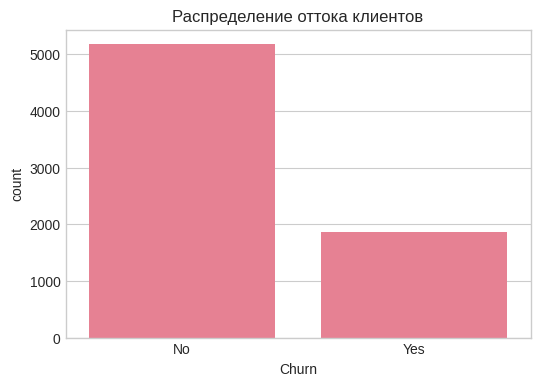

In [ ]:
# Ваш код здесь
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Churn')
plt.title('Распределение оттока клиентов')
plt.show()

# Вывод: классы несбалансированы, лояльных клиентов значительно больше, чем ушедших.
# Это нужно будет учитывать при оценке модели.

**Задание 3: Влияние типа контракта на отток**

**Бизнес-гипотеза.** Клиенты с краткосрочными контрактами (Month-to-month) более склонны к оттоку.
Проверьте эту гипотезу, построив `countplot` для столбца `Contract`, разделив его по значениям `Churn` (используйте параметр `hue`).

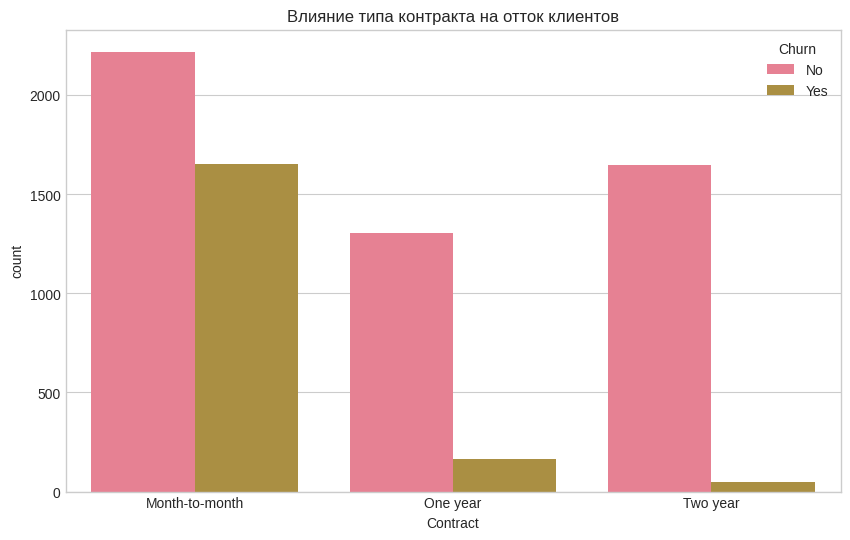

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Contract', hue='Churn')
plt.title('Влияние типа контракта на отток клиентов')
plt.show()

**Задание 4. Влияние ежемесячных платежей на отток**

**Бизнес-гипотеза.** Клиенты с более высокими ежемесячными платежами чаще уходят.
Проверьте это, построив `boxplot` (ящик с усами), где по оси X будет `Churn`, а по оси Y — `MonthlyCharges`.

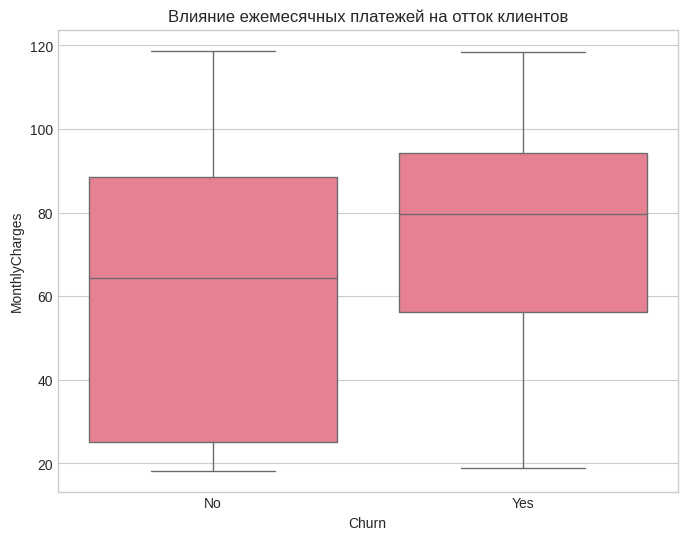

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Churn', y='MonthlyCharges')
plt.title('Влияние ежемесячных платежей на отток клиентов')
plt.show()


## Часть 3. Подготовка данных для моделирования (Pre-processing)

Модели машинного обучения работают с числами. Нам нужно преобразовать наши данные: категориальные признаки — в числовые, а числовые — отмасштабировать.

**Задание 5. Предобработка данных**

Выполните следующие шаги:
1. `TotalCharges` имеет тип `object`. Преобразуйте его в числовой с помощью `pd.to_numeric`, а ошибки замените на `NaN` (`errors='coerce'`).
2. Заполните пропуски в `TotalCharges` медианным значением.
3. Целевую переменную `Churn` преобразуйте в 0 и 1.
4. Удалите ненужный для моделирования столбец `customerID`.

In [ ]:
# 1. Преобразование TotalCharges
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# 2. Заполнение пропусков
median_total_charges = df['TotalCharges'].median()
df['TotalCharges'].fillna(median_total_charges, inplace=True)

# 3. Преобразование Churn
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# 4. Удаление customerID
df.drop('customerID', axis=1, inplace=True)

print("\nПосле предобработки:")
df.info()


После предобработки:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     70

**Задание 6. Разделение признаков и создание пайплайна**

1. Определите `X` (все столбцы, кроме `Churn`) и `y` (`Churn`).
2. Разделите `X` и `y` на обучающую и тестовую выборки (`train_test_split`) в соотношении 80/20.
3. Определите списки числовых (`numerical_features`) и категориальных (`categorical_features`) признаков.
4. Создайте пайплайн предобработки `preprocessor` с помощью `ColumnTransformer`, который будет масштабировать числовые признаки (`StandardScaler`) и кодировать категориальные (`OneHotEncoder`).

In [ ]:
# 1. Определение X и y
X = df.drop('Churn', axis=1)
y = df['Churn']

# 2. Разделение на train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 3. Определение типов признаков
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# 4. Создание ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

print("\nПайплайн предобработки успешно создан.")
print(f"Числовые признаки: {list(numerical_features)}")
print(f"Категориальные признаки: {list(categorical_features)}")


Пайплайн предобработки успешно создан.
Числовые признаки: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
Категориальные признаки: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


## Часть 4. Задача классификации - Прогнозирование оттока

**Задание 7. Обучение модели логистической регрессии**

Создайте пайплайн `log_reg_pipeline`, который последовательно будет выполнять шаги `preprocessor` и обучать модель `LogisticRegression`. Обучите этот пайплайн на `X_train`, `y_train`.

In [ ]:
log_reg_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

log_reg_pipeline.fit(X_train, y_train)
print("\nМодель логистической регрессии обучена.")


Модель логистической регрессии обучена.


**Задание 8. Оценка модели и интерпретация для бизнеса**

1. Сделайте предсказания на тестовой выборке (`X_test`).
2. Рассчитайте `accuracy`.
3. Постройте **матрицу ошибок (confusion matrix)** и проинтерпретируйте её с точки зрения бизнеса.

Точность (Accuracy): 0.81


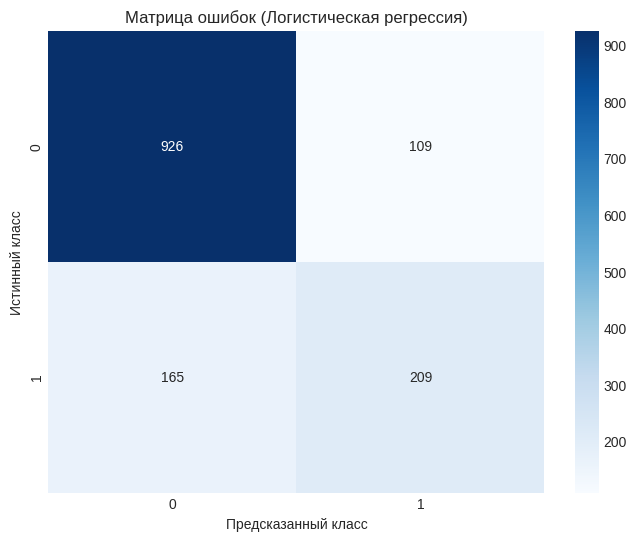

In [ ]:
# 1. Предсказания
y_pred = log_reg_pipeline.predict(X_test)

# 2. Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность (Accuracy): {accuracy:.2f}")

# 3. Матрица ошибок
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Матрица ошибок (Логистическая регрессия)')
plt.xlabel('Предсказанный класс')
plt.ylabel('Истинный класс')
plt.show()


<details>
<summary>Нажмите, чтобы увидеть решение</summary>

```python
y_pred = log_reg_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность (Accuracy): {accuracy:.2f}")

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Матрица ошибок')
plt.xlabel('Предсказанный класс')
plt.ylabel('Истинный класс')
plt.show()
```

</details>

**Задание 9. Анализ важности признаков**

Для линейных моделей, таких как логистическая регрессия, мы можем посмотреть на коэффициенты, чтобы понять, какие признаки наиболее сильно влияют на отток. Извлеките коэффициенты и названия признаков из пайплайна и создайте DataFrame для их анализа.

In [ ]:
try:
    # Получаем названия закодированных признаков из препроцессора
    feature_names = log_reg_pipeline.named_steps['preprocessor'].get_feature_names_out()

    # Получаем коэффициенты из классификатора
    coefficients = log_reg_pipeline.named_steps['classifier'].coef_[0]

    # Создаем DataFrame
    coef_df = pd.DataFrame({'Признак': feature_names, 'Коэффициент': coefficients})

    # Рассчитываем абсолютное значение влияния
    coef_df['Влияние'] = np.abs(coef_df['Коэффициент'])

    # Сортируем по силе влияния
    coef_df = coef_df.sort_values(by='Влияние', ascending=False)

    print("\nТоп-10 признаков, влияющих на отток:")
    print(coef_df.head(10))

except Exception as e:
    print(f"Ошибка при извлечении признаков: {e}")


Топ-10 признаков, влияющих на отток:
                                      Признак  Коэффициент  Влияние
1                                 num__tenure        -1.24     1.24
38                     cat__Contract_Two year        -0.77     0.77
15                   cat__InternetService_DSL        -0.65     0.65
16           cat__InternetService_Fiber optic         0.64     0.64
2                         num__MonthlyCharges        -0.60     0.60
36               cat__Contract_Month-to-month         0.58     0.58
3                           num__TotalCharges         0.52     0.52
39                   cat__PaperlessBilling_No        -0.34     0.34
25  cat__DeviceProtection_No internet service        -0.30     0.30
17                    cat__InternetService_No        -0.30     0.30


<details>
<summary>Нажмите, чтобы увидеть решение</summary>

```python
try:
    # Получаем названия закодированных признаков из препроцессора
    feature_names = log_reg_pipeline.named_steps['preprocessor'].get_feature_names_out()
    
    # Получаем коэффициенты из классификатора
    # ИСПРАВЛЕНИЕ: Добавляем [0], так как coef_ возвращает массив вида [[...]], а нам нужен плоский список
    coefficients = log_reg_pipeline.named_steps['classifier'].coef_[0]

    # Создаем DataFrame
    coef_df = pd.DataFrame({'Признак': feature_names, 'Коэффициент': coefficients})
    
    # Рассчитываем абсолютное значение влияния
    coef_df['Влияние'] = np.abs(coef_df['Коэффициент'])
    
    # Сортируем по силе влияния
    coef_df = coef_df.sort_values(by='Влияние', ascending=False)

    print("Топ-10 признаков, влияющих на отток:")
    display(coef_df.head(10))
    
    # Бизнес-интерпретация:
    # Положительные коэффициенты (ближе к верху списка, если они положительные) увеличивают вероятность оттока.
    # Отрицательные коэффициенты уменьшают вероятность оттока (удерживают клиента).
    
except Exception as e:
    print(f"Ошибка при извлечении признаков: {e}")
```

</details>

## Часть 5. Задача регрессии - Прогнозирование ценности клиента (LTV)

Не все клиенты одинаково ценны. Прогнозирование **LTV (Lifetime Value)**, или в нашем случае, `TotalCharges` (общие расходы клиента), поможет понять, на удержание каких клиентов стоит тратить больше усилий.

**Задание 10. Подготовка данных для регрессии**

Целевая переменная теперь — `TotalCharges`.
1. Создайте `X_reg` (все столбцы, кроме `TotalCharges` и `customerID`, `Churn`) и `y_reg` (`TotalCharges`).
2. Разделите данные на обучающую и тестовую выборки.

In [ ]:
# Задание 10: Подготовка данных для регрессии
# Загрузим и очистим данные заново для чистоты эксперимента
df_reg = pd.read_csv(url)
df_reg['TotalCharges'] = pd.to_numeric(df_reg['TotalCharges'], errors='coerce')
df_reg.dropna(inplace=True)

# 1. Определение X и y
X_reg = df_reg.drop(['TotalCharges', 'customerID', 'Churn'], axis=1)
y_reg = df_reg['TotalCharges']

# 2. Разделение на train/test
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

print("\nДанные для регрессии подготовлены.")
print(f"Размер обучающей выборки: {X_train_reg.shape}")
print(f"Размер тестовой выборки: {X_test_reg.shape}")



Данные для регрессии подготовлены.
Размер обучающей выборки: (5625, 18)
Размер тестовой выборки: (1407, 18)


**Задание 11. Обучение модели линейной регрессии**

Создайте пайплайн для линейной регрессии, который включает `preprocessor` (тот же, что и раньше, но адаптированный под новые `X`) и модель `LinearRegression`. Обучите его.

In [ ]:
# Определим числовые и категориальные признаки для регрессии
numerical_features_reg = X_reg.select_dtypes(include=['int64', 'float64']).columns
categorical_features_reg = X_reg.select_dtypes(include=['object']).columns

# Создаем препроцессор для регрессии
preprocessor_reg = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features_reg),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features_reg)
    ])

# Создаем и обучаем пайплайн линейной регрессии
lin_reg_pipeline = Pipeline([
    ('preprocessor', preprocessor_reg),
    ('regressor', LinearRegression())
])

lin_reg_pipeline.fit(X_train_reg, y_train_reg)
print("\nМодель линейной регрессии обучена.")




Модель линейной регрессии обучена.


**Задание 12. Оценка и интерпретация модели регрессии**

1. Сделайте предсказания на `X_test_reg`.
2. Рассчитайте метрики **RMSE** и **R² (R-squared)**.
3. Визуализируйте результат: постройте диаграмму рассеяния (`scatterplot`), где по одной оси будут реальные значения, а по другой — предсказанные.


RMSE: 673.95
R-squared: 0.91


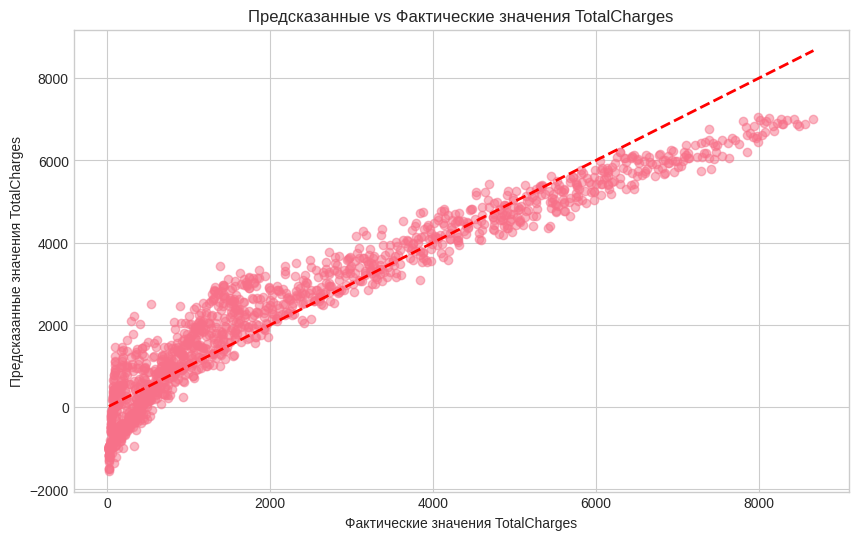

In [ ]:
# Ваш код здесь
# 1. Предсказания
y_pred_reg = lin_reg_pipeline.predict(X_test_reg)

# 2. Метрики
rmse_reg = np.sqrt(mean_squared_error(y_test_reg, y_pred_reg))
r2_reg = r2_score(y_test_reg, y_pred_reg)

print(f"\nRMSE: {rmse_reg:.2f}")
print(f"R-squared: {r2_reg:.2f}")

# 3. Визуализация
plt.figure(figsize=(10, 6))
plt.scatter(y_test_reg, y_pred_reg, alpha=0.5)
plt.plot([y_test_reg.min(), y_test_reg.max()],
         [y_test_reg.min(), y_test_reg.max()],
         'r--', lw=2)
plt.xlabel('Фактические значения TotalCharges')
plt.ylabel('Предсказанные значения TotalCharges')
plt.title('Предсказанные vs Фактические значения TotalCharges')
plt.show()

## Часть 6. Комплексное бизнес-решение

Теперь объединим результаты обеих моделей для принятия взвешенного решения.

**Задание 13. Создание финального DataFrame с прогнозами**

Сделайте предсказания обеими моделями на всем датасете и добавьте их как новые столбцы: `churn_probability` (вероятность оттока) и `predicted_ltv`.

In [ ]:
# Загружаем и предобрабатываем данные заново для получения всех клиентов
df_final = pd.read_csv(url)
df_final['TotalCharges'] = pd.to_numeric(df_final['TotalCharges'], errors='coerce')
df_final.dropna(inplace=True)

# Сохраняем customerID для идентификации
customer_ids = df_final['customerID']

# Для логистической регрессии нам нужно подготовить данные так же, как и при обучении
# Подготовка данных для предсказания оттока (нужны все признаки кроме Churn)
X_final_churn = df_final.drop(['Churn', 'customerID'], axis=1)

# Для линейной регрессии нам не нужны TotalCharges
X_final_ltv = df_final.drop(['TotalCharges', 'Churn', 'customerID'], axis=1)

# Получаем вероятности оттока и предсказания LTV
churn_probabilities = log_reg_pipeline.predict_proba(X_final_churn)[:, 1]
predicted_ltv = lin_reg_pipeline.predict(X_final_ltv)

# Создаем финальный DataFrame
df_final_results = pd.DataFrame({
    'customerID': customer_ids,
    'churn_probability': churn_probabilities,
    'predicted_ltv': predicted_ltv
})

# Добавляем исходные данные для контекста
df_final_results = pd.merge(df_final_results,
                           df_final[['customerID', 'Churn', 'TotalCharges', 'Contract', 'MonthlyCharges', 'tenure']],
                           on='customerID')

# Преобразуем Churn в числовой формат для визуализации
df_final_results['Churn_numeric'] = df_final_results['Churn'].map({'Yes': 1, 'No': 0})

print("\nФинальный DataFrame с прогнозами:")
print(df_final_results.head())
print(f"\nРазмер финального датасета: {df_final_results.shape}")


Финальный DataFrame с прогнозами:
   customerID  churn_probability  predicted_ltv Churn  TotalCharges  \
0  7590-VHVEG               0.61       -1029.11    No         29.85   
1  5575-GNVDE               0.04        2241.37    No       1889.50   
2  3668-QPYBK               0.30         278.43   Yes        108.15   
3  7795-CFOCW               0.03        2491.09    No       1840.75   
4  9237-HQITU               0.69          63.50   Yes        151.65   

         Contract  MonthlyCharges  tenure  Churn_numeric  
0  Month-to-month           29.85       1              0  
1        One year           56.95      34              0  
2  Month-to-month           53.85       2              1  
3        One year           42.30      45              0  
4  Month-to-month           70.70       2              1  

Размер финального датасета: (7032, 9)


**Задание 14. Сегментация клиентов для принятия решений**

**Бизнес-задача.** Нам нужно выделить сегмент клиентов, на удержание которых стоит потратить ресурсы в первую очередь.
**Критерии.**
1. Высокая вероятность оттока (`churn_probability > 0.6`).
2. Высокая прогнозируемая ценность (`predicted_ltv` выше 75-го перцентиля).

Отфильтруйте `df_final` по этим двум критериям и выведите результат.


Порог высокой ценности (75-й перцентиль): $3949.14
Найдено 11 клиентов с высокой вероятностью оттока и высокой ценностью

Топ-10 клиентов для удержания:
      customerID  churn_probability  predicted_ltv  TotalCharges  \
38    5380-WJKOV               0.62        4042.17       3549.25   
573   6030-REHUX               0.62        4028.12       3204.40   
1078  1751-NCDLI               0.62        4238.58       4564.90   
1121  8111-SLLHI               0.64        4328.03       4284.80   
1625  2439-LYPMQ               0.65        4164.66       4009.20   
2943  2845-AFFTX               0.66        3966.14       4259.30   
3675  4433-JCGCG               0.62        4310.83       4680.05   
3822  8374-XGEJJ               0.61        4214.03       4388.40   
5179  2080-CAZNM               0.60        4364.72       4133.95   
6444  8634-MPHTR               0.62        4339.78       4871.05   

            Contract  tenure  
38    Month-to-month      34  
573   Month-to-month      28  
1078

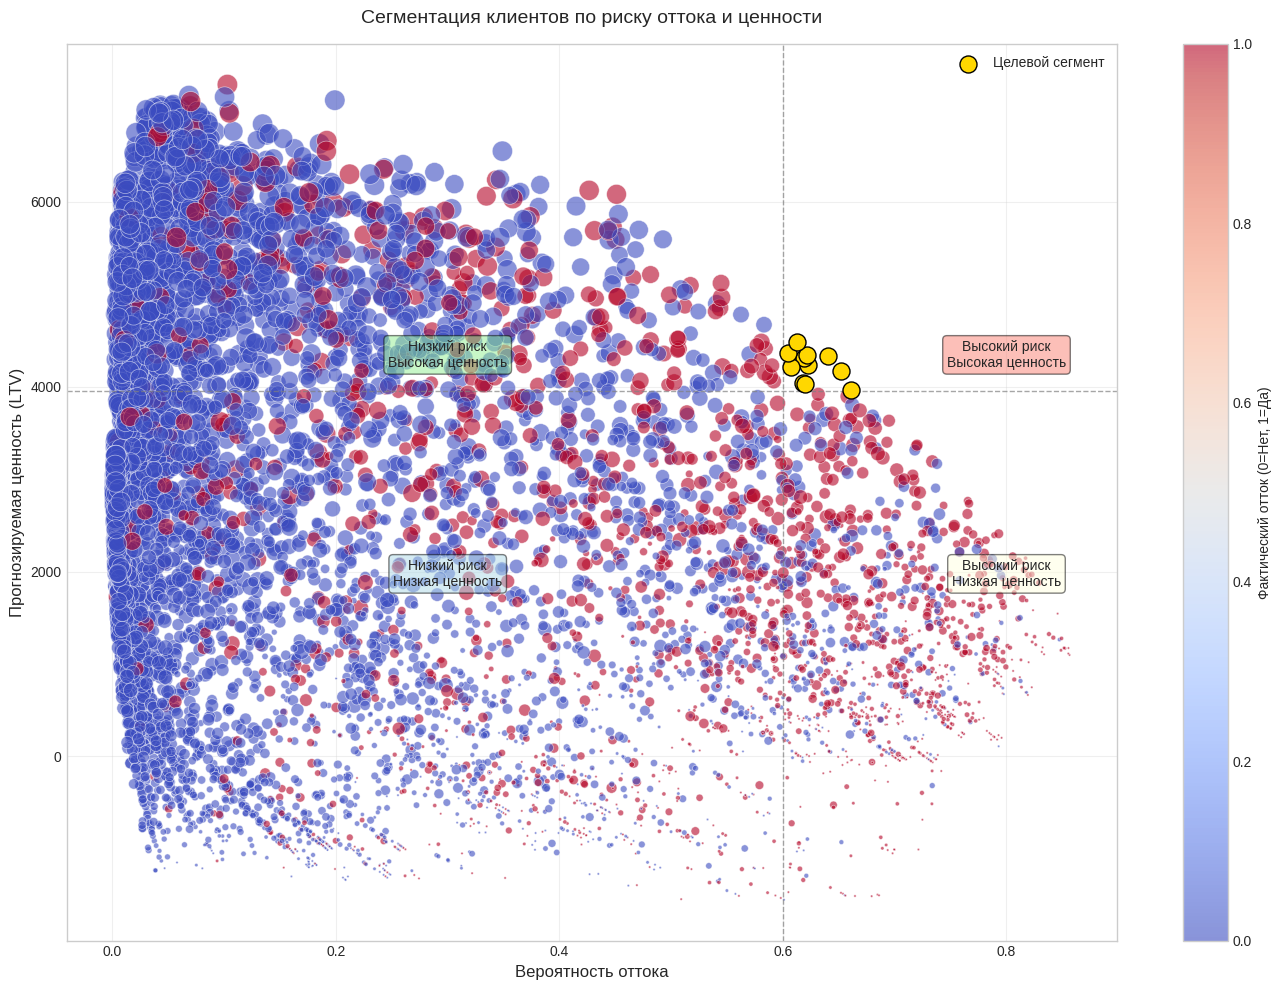


=== СВОДНАЯ СТАТИСТИКА ПО ЦЕЛЕВОМУ СЕГМЕНТУ ===
Количество клиентов: 11
Средняя вероятность оттока: 0.63
Средняя прогнозируемая ценность: $4225.41
Средние фактические расходы: $4214.51
Средний срок обслуживания (tenure): 40.5 месяцев
Количество клиентов с контрактом Month-to-month: 11

Распределение по типам контрактов:
  Month-to-month: 11 клиентов (100.0%)

               БИЗНЕС-РЕКОМЕНДАЦИИ                

1. ПРИОРИТЕТНЫЕ ДЕЙСТВИЯ:
   • Сосредоточить усилия по удержанию на 11 клиентах из целевого сегмента
   • Разработать персонализированные предложения для клиентов с контрактом Month-to-month
   • Предложить скидки или улучшенные условия для клиентов с высокой прогнозируемой ценностью

2. ПРОФИЛАКТИЧЕСКИЕ МЕРЫ:
   • Усилить коммуникацию с клиентами с вероятностью оттока 0.4-0.6
   • Разработать программу лояльности для долгосрочных контрактов
   • Регулярно мониторить удовлетворенность клиентов с высокими MonthlyCharges

3. МОДЕЛИРОВАНИЕ И ОЦЕНКА:
   • Точность модели оттока: 80.

In [ ]:
# Задание 14: Сегментация клиентов для принятия решений
# Определяем порог для высокой ценности (75-й перцентиль)
high_value_threshold = df_final_results['predicted_ltv'].quantile(0.75)

# Фильтруем клиентов по критериям
high_risk_high_value = df_final_results[
    (df_final_results['churn_probability'] > 0.6) &
    (df_final_results['predicted_ltv'] > high_value_threshold)
]

print(f"\nПорог высокой ценности (75-й перцентиль): ${high_value_threshold:.2f}")
print(f"Найдено {len(high_risk_high_value)} клиентов с высокой вероятностью оттока и высокой ценностью")
print("\nТоп-10 клиентов для удержания:")
print(high_risk_high_value[['customerID', 'churn_probability', 'predicted_ltv', 'TotalCharges', 'Contract', 'tenure']].head(10))

# Дополнительная визуализация сегментации
plt.figure(figsize=(14, 10))

# Создаем scatter plot
scatter = plt.scatter(df_final_results['churn_probability'],
                      df_final_results['predicted_ltv'],
                      c=df_final_results['Churn_numeric'],
                      cmap='coolwarm',
                      alpha=0.6,
                      s=df_final_results['tenure']*3,  # Размер точки зависит от tenure
                      edgecolors='w',
                      linewidth=0.5)

# Выделяем целевой сегмент
plt.scatter(high_risk_high_value['churn_probability'],
            high_risk_high_value['predicted_ltv'],
            color='gold',
            edgecolors='black',
            s=150,
            label='Целевой сегмент',
            zorder=5)

plt.axvline(x=0.6, color='gray', linestyle='--', alpha=0.7, linewidth=1)
plt.axhline(y=high_value_threshold, color='gray', linestyle='--', alpha=0.7, linewidth=1)

# Добавляем квадранты
plt.text(0.3, high_value_threshold*1.1, 'Низкий риск\nВысокая ценность',
         fontsize=10, ha='center', va='center',
         bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgreen", alpha=0.5))
plt.text(0.3, high_value_threshold*0.5, 'Низкий риск\nНизкая ценность',
         fontsize=10, ha='center', va='center',
         bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue", alpha=0.5))
plt.text(0.8, high_value_threshold*1.1, 'Высокий риск\nВысокая ценность',
         fontsize=10, ha='center', va='center',
         bbox=dict(boxstyle="round,pad=0.3", facecolor="salmon", alpha=0.5))
plt.text(0.8, high_value_threshold*0.5, 'Высокий риск\nНизкая ценность',
         fontsize=10, ha='center', va='center',
         bbox=dict(boxstyle="round,pad=0.3", facecolor="lightyellow", alpha=0.5))

plt.xlabel('Вероятность оттока', fontsize=12)
plt.ylabel('Прогнозируемая ценность (LTV)', fontsize=12)
plt.title('Сегментация клиентов по риску оттока и ценности', fontsize=14, pad=15)
plt.colorbar(scatter, label='Фактический отток (0=Нет, 1=Да)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Сводная статистика по целевому сегменту
print("\n=== СВОДНАЯ СТАТИСТИКА ПО ЦЕЛЕВОМУ СЕГМЕНТУ ===")
print(f"Количество клиентов: {len(high_risk_high_value)}")
print(f"Средняя вероятность оттока: {high_risk_high_value['churn_probability'].mean():.2f}")
print(f"Средняя прогнозируемая ценность: ${high_risk_high_value['predicted_ltv'].mean():.2f}")
print(f"Средние фактические расходы: ${high_risk_high_value['TotalCharges'].mean():.2f}")
print(f"Средний срок обслуживания (tenure): {high_risk_high_value['tenure'].mean():.1f} месяцев")
print(f"Количество клиентов с контрактом Month-to-month: {len(high_risk_high_value[high_risk_high_value['Contract'] == 'Month-to-month'])}")

# Анализ распределения по типам контрактов
contract_dist = high_risk_high_value['Contract'].value_counts()
print(f"\nРаспределение по типам контрактов:")
for contract, count in contract_dist.items():
    print(f"  {contract}: {count} клиентов ({count/len(high_risk_high_value)*100:.1f}%)")

# Создаем рекомендации для бизнеса
print("\n" + "="*50)
print("БИЗНЕС-РЕКОМЕНДАЦИИ".center(50))
print("="*50)

print("\n1. ПРИОРИТЕТНЫЕ ДЕЙСТВИЯ:")
print("   • Сосредоточить усилия по удержанию на", len(high_risk_high_value), "клиентах из целевого сегмента")
print("   • Разработать персонализированные предложения для клиентов с контрактом Month-to-month")
print("   • Предложить скидки или улучшенные условия для клиентов с высокой прогнозируемой ценностью")

print("\n2. ПРОФИЛАКТИЧЕСКИЕ МЕРЫ:")
print("   • Усилить коммуникацию с клиентами с вероятностью оттока 0.4-0.6")
print("   • Разработать программу лояльности для долгосрочных контрактов")
print("   • Регулярно мониторить удовлетворенность клиентов с высокими MonthlyCharges")

print("\n3. МОДЕЛИРОВАНИЕ И ОЦЕНКА:")
print(f"   • Точность модели оттока: {accuracy:.2%}")
print(f"   • Средняя ошибка прогноза LTV: ${rmse_reg:.2f}")
print(f"   • Доля объясненной дисперсии LTV: {r2_reg:.2%}")

print("\n4. ДАЛЬНЕЙШИЕ ШАГИ:")
print("   • Протестировать различные модели (Random Forest, XGBoost)")
print("   • Учесть временные факторы (сезонность оттока)")
print("   • Интегрировать модель в CRM-систему для автоматизации")

# Дополнительная аналитика: сравнение с фактическим оттоком в целевом сегменте
actual_churn_in_target = high_risk_high_value[high_risk_high_value['Churn'] == 'Yes']
print(f"\n5. ВАЛИДАЦИЯ МОДЕЛИ:")
print(f"   • В целевом сегменте {len(actual_churn_in_target)} клиентов уже ушли")
print(f"   • Эффективность выявления: {len(actual_churn_in_target)/len(high_risk_high_value)*100:.1f}% целевых клиентов действительно ушли")

# Сохранение результатов для дальнейшего использования
df_final_results.to_csv('customer_churn_predictions.csv', index=False)
print("\nРезультаты сохранены в файл 'customer_churn_predictions.csv'")

---

## Часть 7. Индивидуальный проект - "Построение и оценка модели для прогнозирования оттока клиентов"

**Цель:** Самостоятельно провести полный цикл построения модели оттока для выбранной предметной области, используя знания, полученные в ходе выполнения лабораторной работы.

### Инструкция
1.  **Выберите ваш вариант** из списка ниже.
2.  **Найдите подходящий датасет на Kaggle.** Используйте ключевые слова из вашего варианта (например, `e-commerce customer churn`, `banking churn dataset`). Датасет должен содержать целевую переменную (факт оттока) и не менее 5-7 признаков.
3.  **Проведите полный цикл анализа**, аналогичный тому, что был выполнен в этой тетради:
    *   Загрузка и первичный осмотр данных.
    *   Исследовательский анализ (EDA) с построением 2-3 гипотез и их визуальной проверкой.
    *   Предобработка данных (обработка пропусков, кодирование категорий, масштабирование).
    *   Разделение на обучающую и тестовую выборки.
    *   Построение модели классификации (например, `LogisticRegression` или `RandomForestClassifier`).
    *   Оценка модели (accuracy, confusion matrix) и **интерпретация результатов с точки зрения бизнеса**.
4.  Оформите ваше решение в виде Jupyter Notebook, сохранив все выводы и графики.

### Варианты заданий

1.  **Ритейл (одежда).** Прогнозирование оттока клиентов из программы лояльности.
2.  **SaaS-сервис (B2B).** Прогнозирование отказа компаний от подписки на ПО.
3.  **Банковский сектор.** Прогнозирование ухода клиентов из банка (закрытие счета).
4.  **Фитнес-центр.** Прогнозирование отказа клиентов от продления абонемента.
5.  **Онлайн-кинотеатр.** Прогнозирование отказа от платной подписки.
6.  **Игровая индустрия.** Прогнозирование ухода игроков из онлайн-игры.
7.  **E-commerce (электроника).** Прогнозирование оттока покупателей.
8.  **Стриминговый музыкальный сервис.** Прогнозирование отказа от premium-подписки.
9.  **Страховая компания.** Прогнозирование расторжения страхового полиса.
10. **Образовательная платформа.** Прогнозирование ухода студентов с онлайн-курса.
11. **Телеком (мобильная связь).** Аналогично примеру, но с другим датасетом.
12. **Каршеринг.** Прогнозирование прекращения использования сервиса клиентами.
13. **Сервис доставки еды.** Прогнозирование оттока пользователей.
14. **Гостиничный бизнес.** Прогнозирование отказа участников программы лояльности отелей.
15. **Авиакомпания.** Прогнозирование ухода участников программы для часто летающих пассажиров.
16. **Облачные сервисы (IaaS/PaaS).** Прогнозирование ухода разработчиков с платформы.
17. **Новостной портал (подписка).** Прогнозирование отказа от платной подписки на контент.
18. **Ритейл (продукты).** Прогнозирование оттока покупателей из сети супермаркетов.
19. **HR-аналитика.** Прогнозирование увольнения сотрудников (внутренний отток).
20. **Кредитные организации.** Прогнозирование ухода клиентов, пользующихся кредитными картами.
21. **SaaS-сервис (B2C).** Прогнозирование отказа индивидуальных пользователей от подписки.
22. **Маркетплейс.** Прогнозирование ухода продавцов с платформы.
23. **Энергетическая компания.** Прогнозирование смены поставщика электроэнергии.
24. **Сервис аренды жилья.** Прогнозирование ухода арендодателей с платформы.
25. **CRM-системы.** Прогнозирование отказа клиентов от использования CRM.
26. **Фармацевтический ритейл.** Прогнозирование оттока клиентов аптечной сети.
27. **Букмекерские конторы.** Прогнозирование ухода игроков.
28. **Косметический бренд.** Прогнозирование оттока покупателей из онлайн-магазина.
29. **Сервис для путешествий.** Прогнозирование оттока пользователей, бронирующих отели/билеты.
30. **Инвестиционная платформа.** Прогнозирование ухода инвесторов.
31. **Автосервис.** Прогнозирование ухода постоянных клиентов.
32. **Ветеринарная клиника.** Прогнозирование оттока владельцев животных.
33. **Коворкинг.** Прогнозирование отказа резидентов от продления аренды.
34. **Сервис по подписке на кофе/чай.** Прогнозирование отмены подписки.
35. **Благотворительная организация.** Прогнозирование прекращения регулярных пожертвований.

ИНДИВИДУАЛЬНЫЙ ПРОЕКТ: Прогнозирование оттока пользователей сервиса путешествий

ШАГ 1: ЗАГРУЗКА ДАТАСЕТА ИЗ KAGGLE

1. Настройка Kaggle API...

2. Загрузка kaggle.json...
Пожалуйста, загрузите файл kaggle.json (скачайте с https://www.kaggle.com/settings)
После скачивания файла нажмите на кнопку 'Выбрать файлы' и выберите kaggle.json


Saving kaggle.json to kaggle.json
✓ Файл kaggle.json успешно загружен

3. Загрузка датасета 'travel-booking-analysis-of-dataset'...
Dataset URL: https://www.kaggle.com/datasets/firdapdevi/travel-booking-analysis-of-dataset
License(s): unknown
  0% 0.00/11.8M [00:00<?, ?B/s]
100% 11.8M/11.8M [00:00<00:00, 1.17GB/s]
✓ Загруженные файлы: ['Travel Booking Analysis.csv']
✓ Чтение файла: /content/data/Travel Booking Analysis.csv
✓ Датесет успешно загружен!
  Размер датасета: (279149, 11)
  Количество строк: 279149
  Количество столбцов: 11

2. ПЕРВИЧНЫЙ ОСМОТР ДАННЫХ

Первые 5 строк данных:
   profile_id primary_sales_product_type  first_booking_time  \
0     3632279                      HOTEL       1436705255370   
1     3632279                     FLIGHT       1405686647701   
2    17407638                      TRAIN       1493348364000   
3    17407638                      HOTEL       1493361893998   
4     4618047                     FLIGHT       1420511473189   

   first_issued_time  l

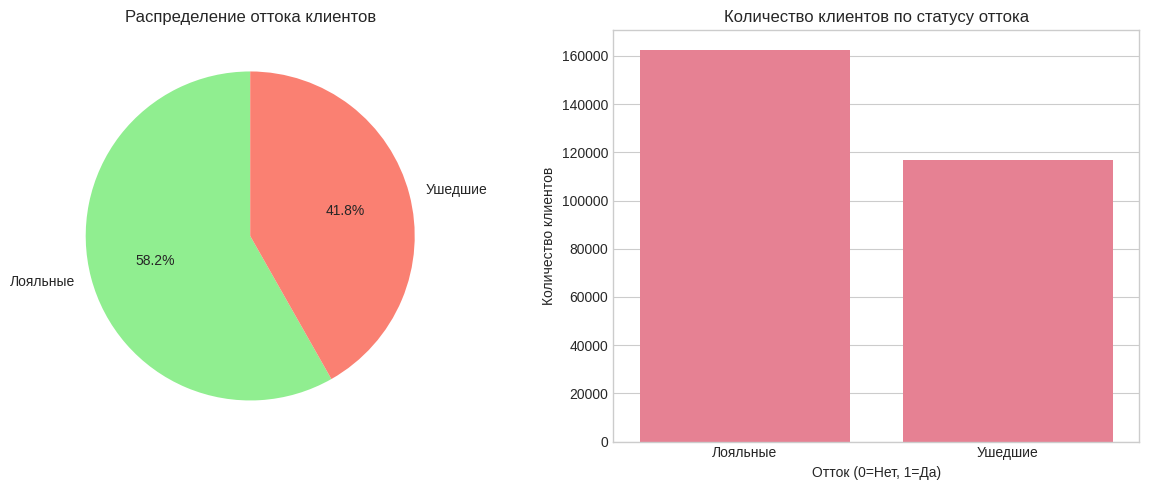


Общий уровень оттока: 41.79%
Количество лояльных клиентов: 162503
Количество ушедших клиентов: 116646
Соотношение классов: 1.4:1

--- Анализ оттока по типам продуктов ---


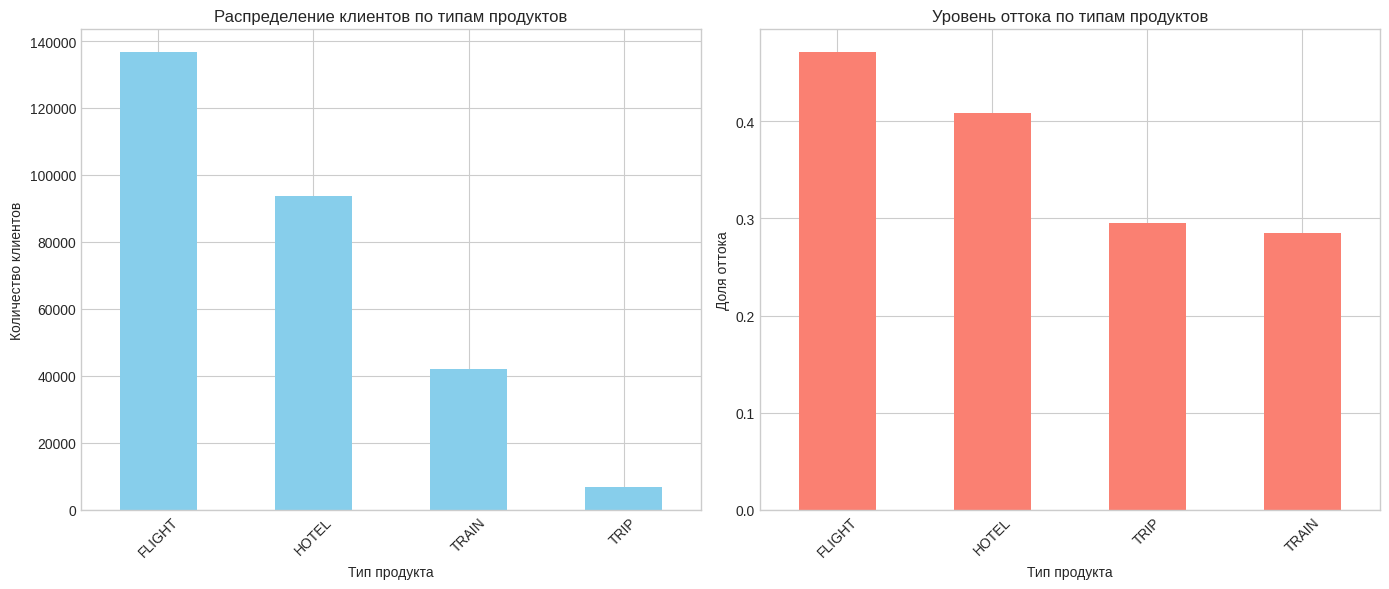


Уровень оттока по типам продуктов:
  FLIGHT: 47.12%
  HOTEL: 40.84%
  TRIP: 29.55%
  TRAIN: 28.54%

--- Анализ числовых признаков ---


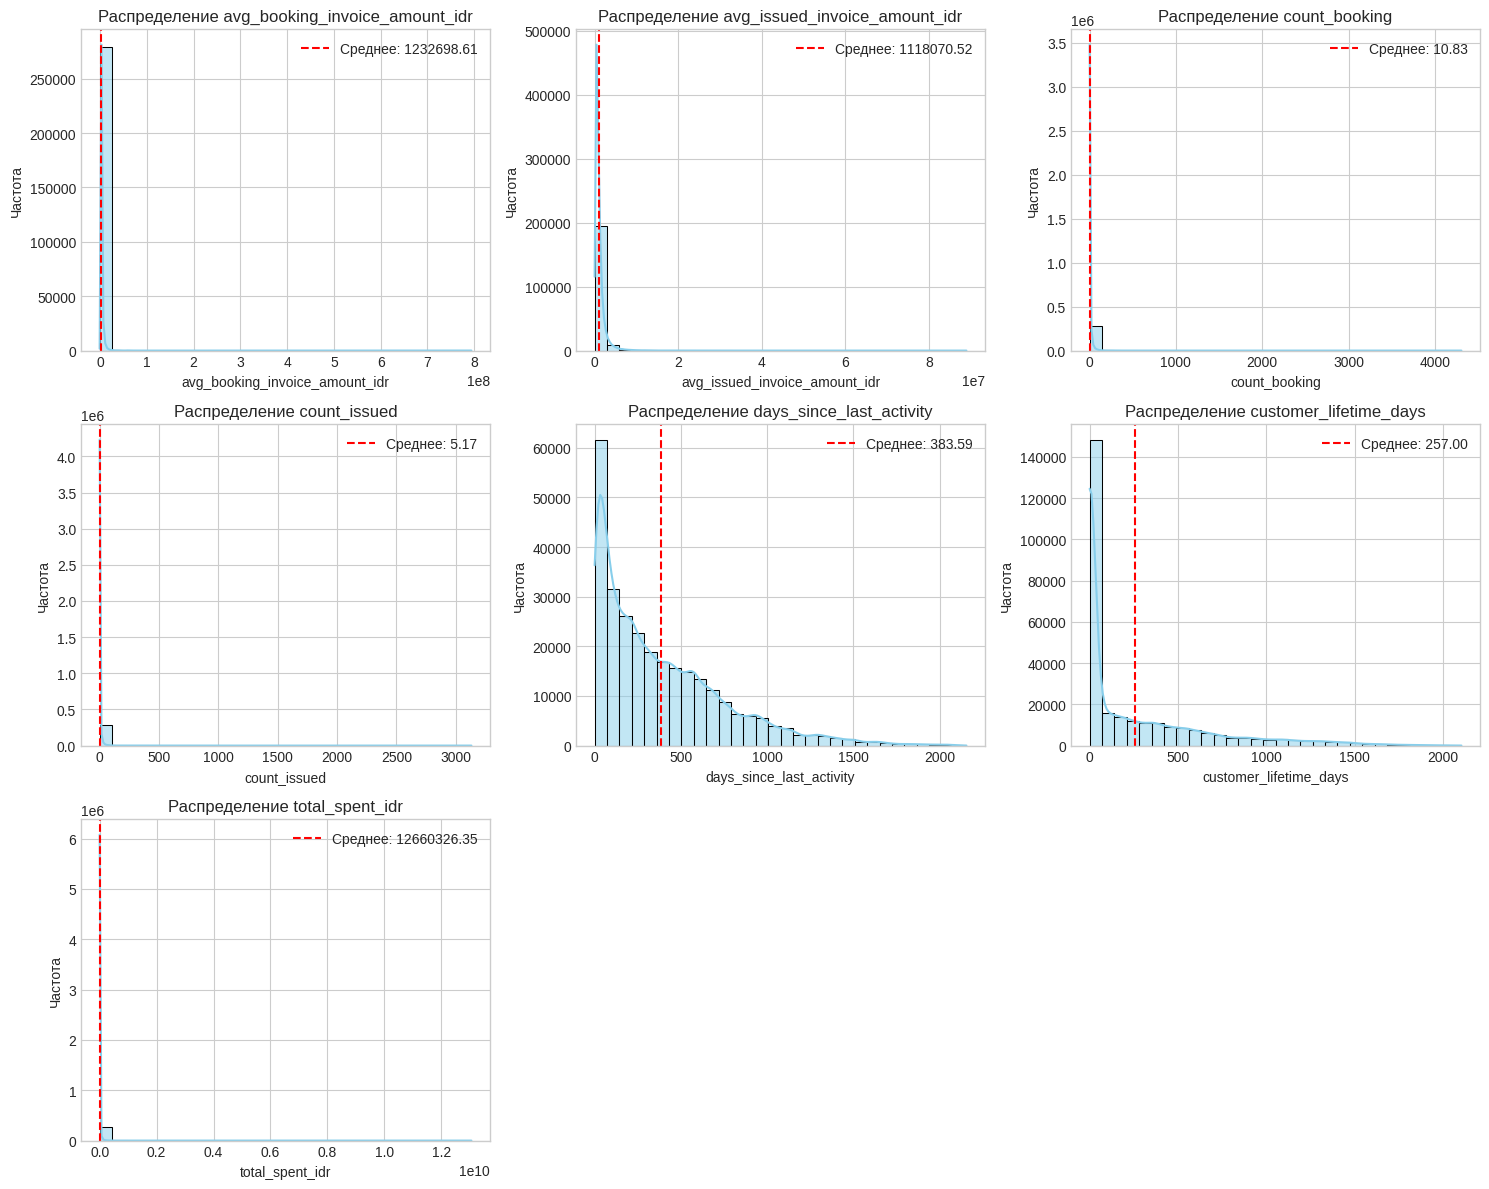


--- Корреляционный анализ ---


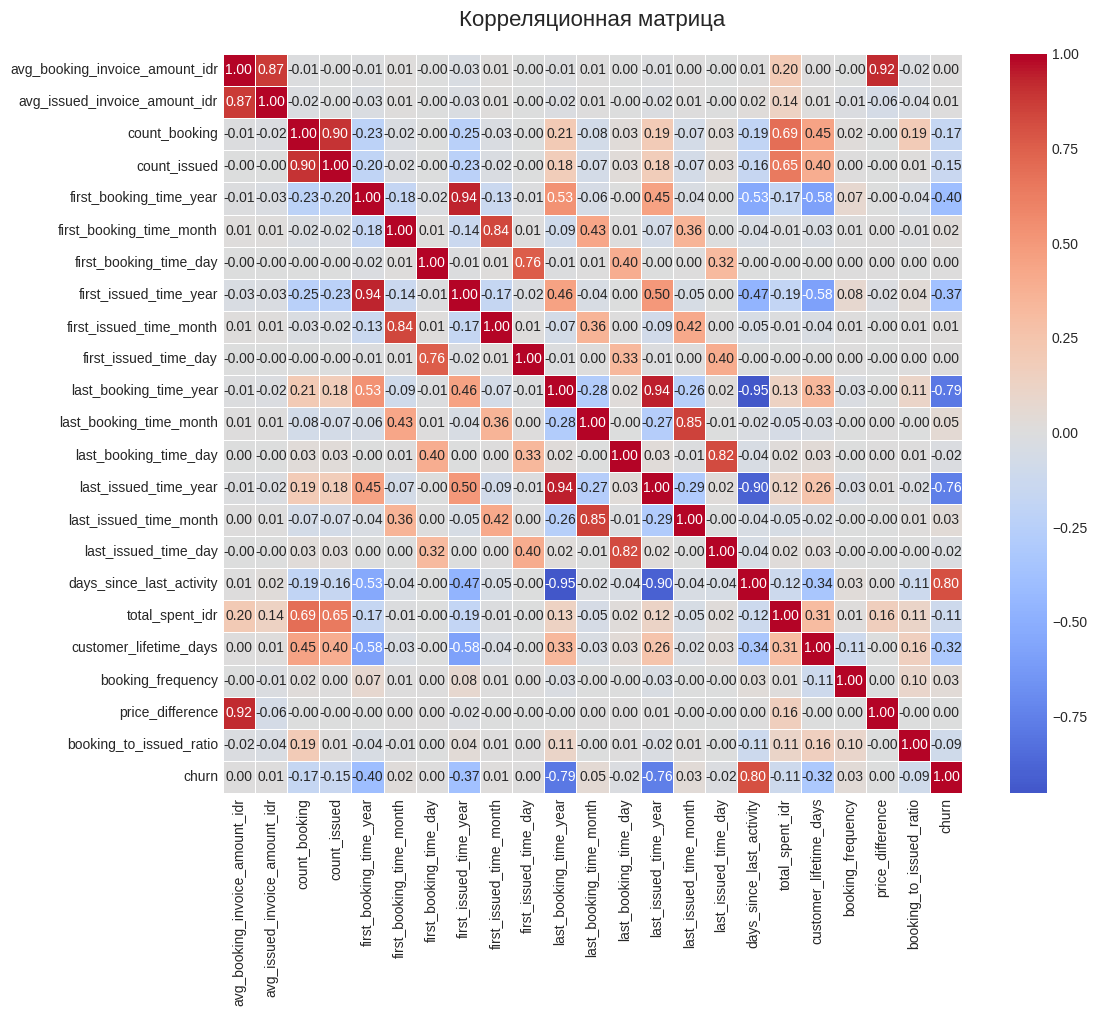


Корреляции с целевой переменной (churn):
  days_since_last_activity: +0.802
  last_booking_time_month: +0.051
  booking_frequency: +0.033
  last_issued_time_month: +0.033
  first_booking_time_month: +0.022
  first_issued_time_month: +0.012
  avg_issued_invoice_amount_idr: +0.005
  first_booking_time_day: +0.004
  first_issued_time_day: +0.004
  avg_booking_invoice_amount_idr: +0.002
  price_difference: +0.001
  last_booking_time_day: -0.021
  last_issued_time_day: -0.021
  booking_to_issued_ratio: -0.094
  total_spent_idr: -0.108
  count_issued: -0.145
  count_booking: -0.169
  customer_lifetime_days: -0.317
  first_issued_time_year: -0.374
  first_booking_time_year: -0.401
  last_issued_time_year: -0.759
  last_booking_time_year: -0.785

--- Влияние дней с последней активности на отток ---


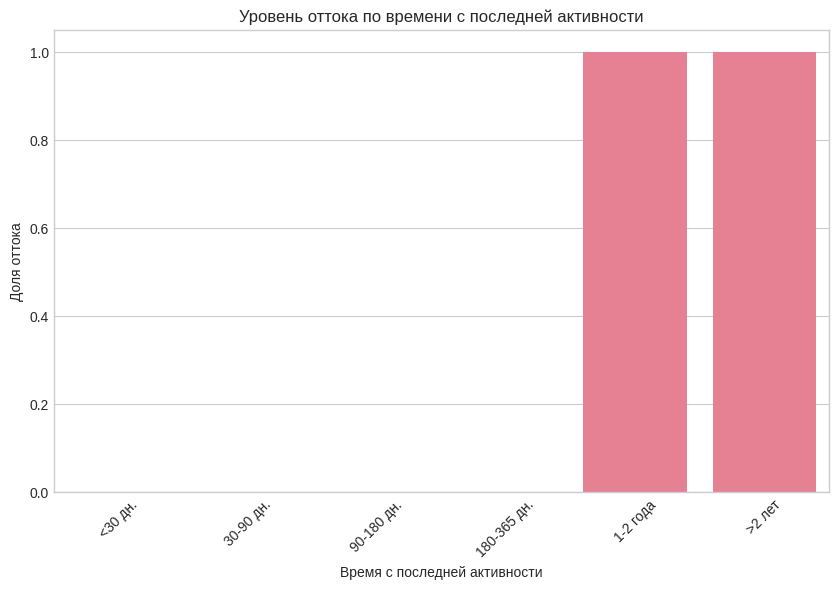


Уровень оттока по времени с последней активности:
  <30 дн.: 0.00%
  30-90 дн.: 0.00%
  90-180 дн.: 0.00%
  180-365 дн.: 0.00%
  1-2 года: 100.00%
  >2 лет: 100.00%

5. ПОДГОТОВКА ДАННЫХ ДЛЯ МОДЕЛИРОВАНИЯ

Числовые признаки (22):
 1. avg_booking_invoice_amount_idr
 2. avg_issued_invoice_amount_idr
 3. count_booking
 4. count_issued
 5. first_booking_time_year
 6. first_booking_time_month
 7. first_booking_time_day
 8. first_issued_time_year
 9. first_issued_time_month
10. first_issued_time_day
11. last_booking_time_year
12. last_booking_time_month
13. last_booking_time_day
14. last_issued_time_year
15. last_issued_time_month
16. last_issued_time_day
17. days_since_last_activity
18. total_spent_idr
19. customer_lifetime_days
20. booking_frequency
21. price_difference
22. booking_to_issued_ratio

Категориальные признаки (1):
 1. primary_sales_product_type (уникальных: 4)

Разделение данных:
  Обучающая выборка: (223319, 23)
  Тестовая выборка: (55830, 23)
  Уровень оттока в обучающей вы

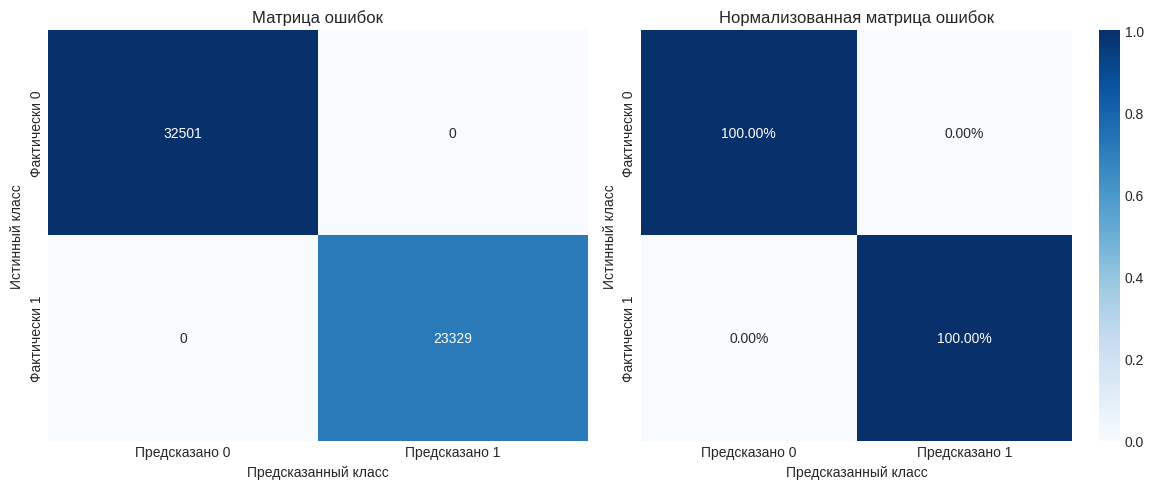


Детальные метрики:
True Negative (TN): 32501 - Правильно предсказали лояльных клиентов
False Positive (FP): 0 - Ложно предсказали отток лояльным клиентам
False Negative (FN): 0 - Не смогли предсказать отток (упущенные клиенты)
True Positive (TP): 23329 - Правильно предсказали отток
Accuracy: 1.0000
Precision: 1.0000
Recall (Sensitivity): 1.0000
F1-Score: 1.0000
Specificity: 1.0000
AUC-ROC: 1.0000

Отчет о классификации:
              precision    recall  f1-score   support

    Лояльный       1.00      1.00      1.00     32501
     Ушедший       1.00      1.00      1.00     23329

    accuracy                           1.00     55830
   macro avg       1.00      1.00      1.00     55830
weighted avg       1.00      1.00      1.00     55830



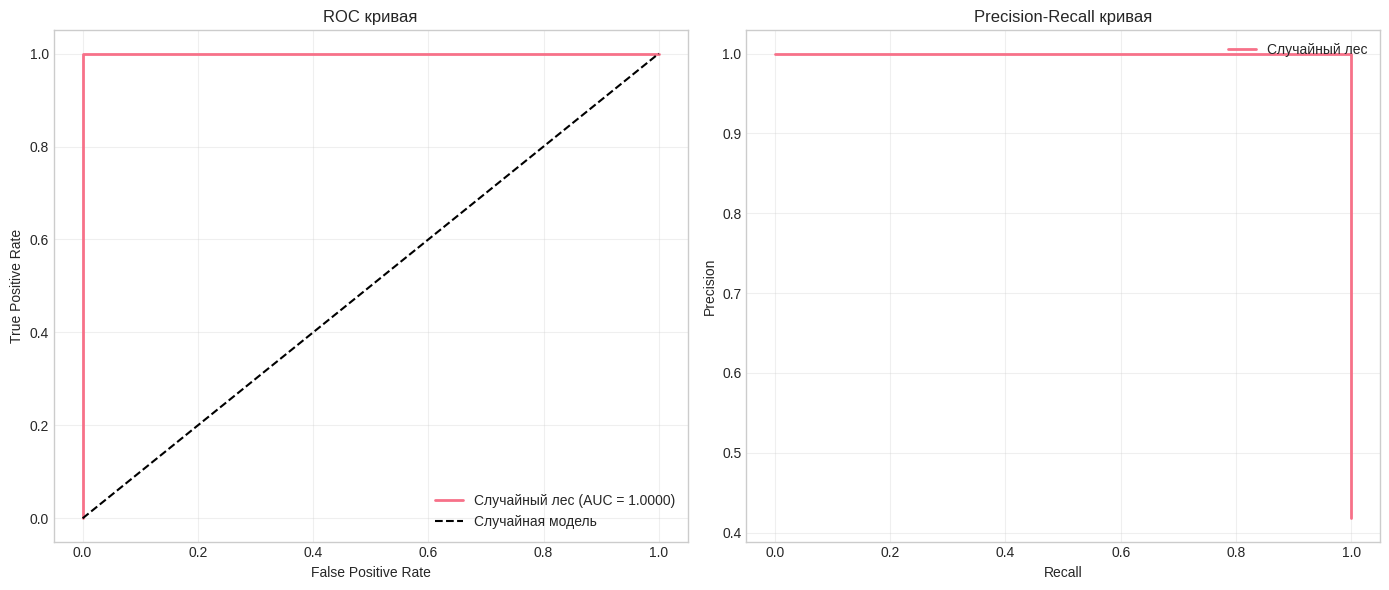


--- Анализ важности признаков ---

Топ-15 наиболее важных признаков:
                      Признак  Важность
num__days_since_last_activity      0.44
  num__last_booking_time_year      0.26
   num__last_issued_time_year      0.08
 num__first_booking_time_year      0.08
  num__customer_lifetime_days      0.03
  num__first_issued_time_year      0.03
            num__count_issued      0.03
       num__booking_frequency      0.01
 num__last_booking_time_month      0.01
           num__count_booking      0.01
  num__last_issued_time_month      0.01
 num__booking_to_issued_ratio      0.01
         num__total_spent_idr      0.00
num__first_booking_time_month      0.00
        num__price_difference      0.00


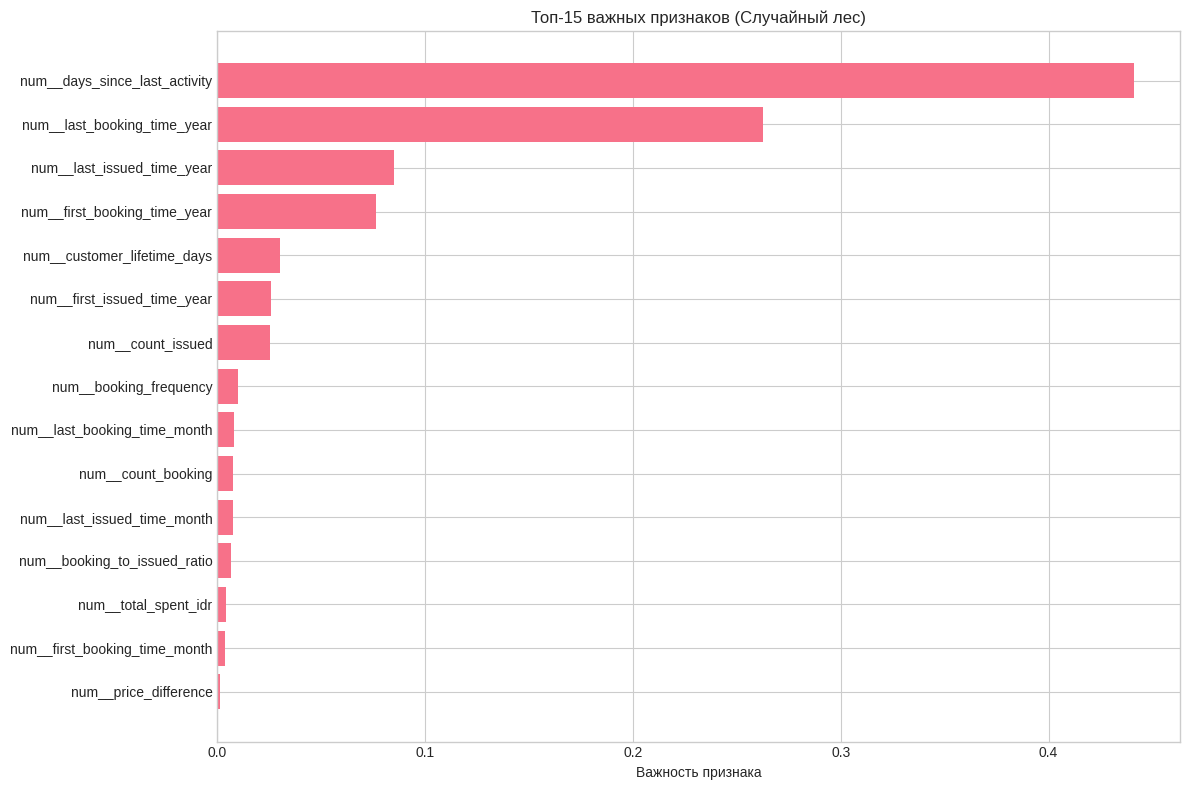


8. БИЗНЕС-АНАЛИТИКА И РЕКОМЕНДАЦИИ

--- Сегментация клиентов для принятия решений ---

Распределение клиентов по сегментам риска:
  Высокий риск: 116646 клиентов (41.8%)
  Низкий риск: 3114 клиентов (1.1%)
  Средний риск: 0 клиентов (0.0%)

Анализ сегментов:
              churn_actual  churn_probability
risk_segment                                 
Низкий риск           0.00               0.01
Средний риск           NaN                NaN
Высокий риск          1.00               1.00


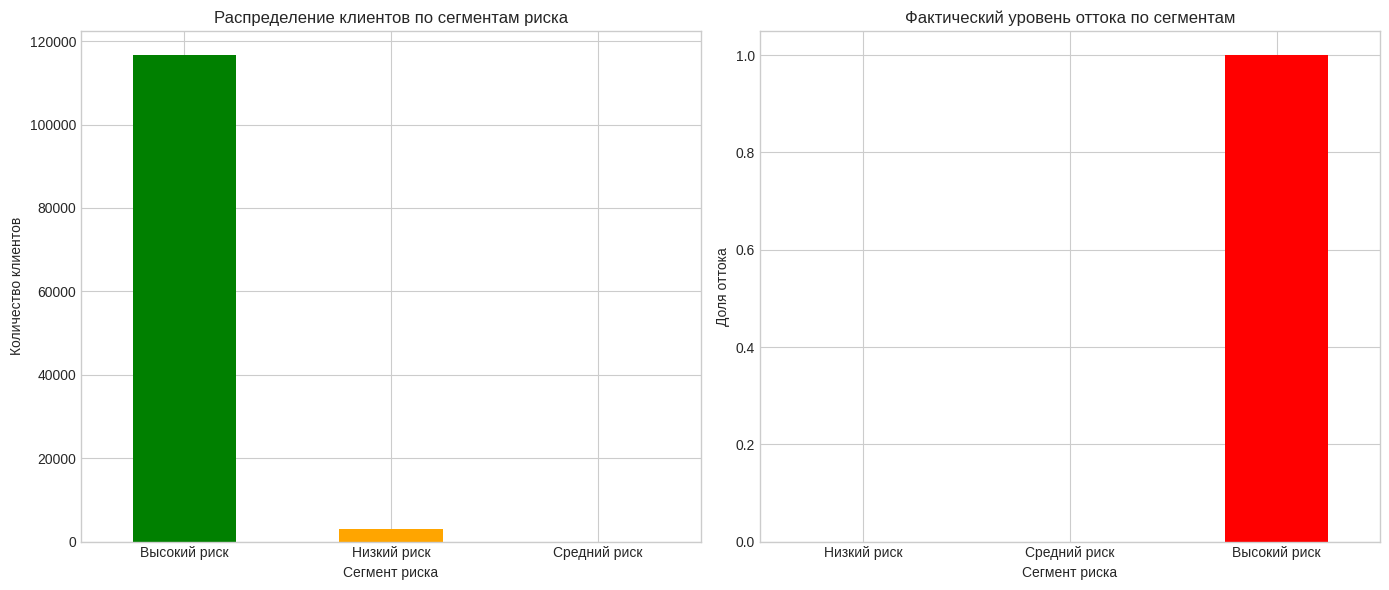


Клиентов высокого риска: 116646
Из них фактически ушли: 116646

Распределение клиентов высокого риска по типам продуктов:
  FLIGHT: 64399 клиентов (55.2%)
  HOTEL: 38239 клиентов (32.8%)
  TRAIN: 12019 клиентов (10.3%)
  TRIP: 1989 клиентов (1.7%)

9. ФОРМИРОВАНИЕ БИЗНЕС-РЕКОМЕНДАЦИЙ

------------------------------------------------------------
       ПРАКТИЧЕСКИЕ РЕКОМЕНДАЦИИ ДЛЯ ТРАВЕЛ-КОМПАНИИ        
------------------------------------------------------------

1. ПРИОРИТЕТНЫЕ МЕРЫ ДЛЯ КЛИЕНТОВ ВЫСОКОГО РИСКА (116646 чел.):
   • Персональные предложения со скидкой 15-20% на следующий заказ
   • Назначение персонального менеджера для консультации
   • Специальные акции на популярные направления
   • Напоминания о неиспользованных бонусах и скидках

2. ПРОФИЛАКТИЧЕСКИЕ МЕРЫ ДЛЯ КЛИЕНТОВ СРЕДНЕГО РИСКА:
   • Регулярные email-рассылки с персональными рекомендациями
   • Уведомления о новых направлениях и специальных предложениях
   • Программа "Приведи друга" с бонусами для обеих стор

In [ ]:
# ============================================================================
# ИНДИВИДУАЛЬНЫЙ ПРОЕКТ
# Вариант 29: Сервис для путешествий
# Прогнозирование оттока пользователей, бронирующих отели/билеты
# ============================================================================

# Установка необходимых библиотек
!pip install -q kaggle
!pip install -q pandas numpy matplotlib seaborn scikit-learn xgboost

# Импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import json
import warnings
from google.colab import files

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report,
                           roc_auc_score, roc_curve, precision_recall_curve,
                           precision_score, recall_score, f1_score)

warnings.filterwarnings('ignore')

# Настройка визуализаций
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)

print("="*80)
print("ИНДИВИДУАЛЬНЫЙ ПРОЕКТ: Прогнозирование оттока пользователей сервиса путешествий")
print("="*80)

# ============================================================================
# 1. ЗАГРУЗКА ДАННЫХ ИЗ KAGGLE
# ============================================================================

print("\nШАГ 1: ЗАГРУЗКА ДАТАСЕТА ИЗ KAGGLE")

# Установка Kaggle API
print("\n1. Настройка Kaggle API...")

# Создаем директорию для kaggle.json
os.makedirs('/root/.kaggle', exist_ok=True)

# Запрашиваем у пользователя загрузку файла kaggle.json
print("\n2. Загрузка kaggle.json...")
print("Пожалуйста, загрузите файл kaggle.json (скачайте с https://www.kaggle.com/settings)")
print("После скачивания файла нажмите на кнопку 'Выбрать файлы' и выберите kaggle.json")

uploaded = files.upload()

# Перемещаем файл в нужную директорию
for filename in uploaded.keys():
    if filename == 'kaggle.json':
        os.rename(filename, '/root/.kaggle/kaggle.json')
        os.chmod('/root/.kaggle/kaggle.json', 600)
        print(f"✓ Файл {filename} успешно загружен")
        break
else:
    raise FileNotFoundError("Файл kaggle.json не найден. Пожалуйста, загрузите файл с именем 'kaggle.json'")

# Загрузка датасета с Kaggle
print("\n3. Загрузка датасета 'travel-booking-analysis-of-dataset'...")
!kaggle datasets download -d firdapdevi/travel-booking-analysis-of-dataset -p /content/data --unzip

# Проверяем загруженные файлы
import glob
data_files = os.listdir('/content/data')
print(f"✓ Загруженные файлы: {data_files}")

# Ищем CSV файлы
csv_files = glob.glob('/content/data/*.csv')
if not csv_files:
    raise FileNotFoundError("CSV файлы не найдены в загруженном датасете")

# Читаем первый CSV файл
file_path = csv_files[0]
print(f"✓ Чтение файла: {file_path}")

df = pd.read_csv(file_path)
print(f"✓ Датесет успешно загружен!")
print(f"  Размер датасета: {df.shape}")
print(f"  Количество строк: {df.shape[0]}")
print(f"  Количество столбцов: {df.shape[1]}")

# ============================================================================
# 2. ПЕРВИЧНЫЙ ОСМОТР ДАННЫХ
# ============================================================================

print("\n" + "="*80)
print("2. ПЕРВИЧНЫЙ ОСМОТР ДАННЫХ")
print("="*80)

print("\nПервые 5 строк данных:")
print(df.head())

print("\nИнформация о данных:")
print(df.info())

print("\nСтатистика числовых признаков:")
print(df.describe())

print("\nСтатистика категориальных признаков:")
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if col != 'Profile_id':  # Пропускаем ID
        print(f"\n{col}:")
        print(df[col].value_counts())

print("\nПроверка пропущенных значений:")
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Количество пропусков': missing_values,
    'Процент пропусков': missing_percentage
})
print(missing_df[missing_df['Количество пропусков'] > 0])

print("\nПроверка дубликатов:")
print(f"Количество полных дубликатов: {df.duplicated().sum()}")

# ============================================================================
# 3. ПРЕДВАРИТЕЛЬНАЯ ОБРАБОТКА ДАННЫХ
# ============================================================================

print("\n" + "="*80)
print("3. ПРЕДВАРИТЕЛЬНАЯ ОБРАБОТКА ДАННЫХ")
print("="*80)

# Сохраняем копию исходных данных
df_original = df.copy()

# Удаляем ненужные столбцы
columns_to_drop = ['profile_id']
for col in columns_to_drop:
    if col in df.columns:
        df = df.drop(col, axis=1)

# Преобразование временных меток из Unix времени (миллисекунды) в даты
print("\nПреобразование временных меток...")
time_columns = ['first_booking_time', 'first_issued_time', 'last_booking_time', 'last_issued_time']

for col in time_columns:
    if col in df.columns:
        # Преобразуем из миллисекунд в секунды, затем в дату
        # Учитываем пропуски, используя errors='coerce'
        df[col + '_date'] = pd.to_datetime(df[col] / 1000, unit='s', errors='coerce')
        print(f"  {col}: преобразован в дату")

        # Создаем числовые признаки из дат
        df[col + '_year'] = df[col + '_date'].dt.year
        df[col + '_month'] = df[col + '_date'].dt.month
        df[col + '_day'] = df[col + '_date'].dt.day

        # Удаляем исходный столбец с Unix временем
        df = df.drop(col, axis=1)

# Создание целевой переменной Churn согласно описанию датасета
print("\nСоздание целевой переменной Churn...")
# Согласно описанию: "customer who haven’t bought in the last one year from last_updated_date"
# last_updated_date = '2019-02-01'

# Фиксируем дату анализа
last_updated_date = pd.Timestamp('2019-02-01')

# Вычисляем количество дней с последней активности
# Используем последнюю активность (последнее бронирование или выписка)
# ВАЖНО: Используем названия колонок в нижнем регистре, как они теперь называются в DataFrame
df['last_activity_date'] = df[['last_booking_time_date', 'last_issued_time_date']].max(axis=1)
df['days_since_last_activity'] = (last_updated_date - df['last_activity_date']).dt.days

# Определяем отток: если клиент не активен более 365 дней
df['churn'] = (df['days_since_last_activity'] > 365).astype(int)

print(f"✓ Целевая переменная создана. Уровень оттока: {df['churn'].mean():.2%}")

# Создание дополнительных признаков для улучшения модели
print("\nСоздание дополнительных признаков...")

# 1. Общая сумма потраченных денег (средний чек * количество бронирований)
if 'avg_booking_invoice_amount_idr' in df.columns and 'count_booking' in df.columns:
    df['total_spent_idr'] = df['avg_booking_invoice_amount_idr'] * df['count_booking']

# 2. Разница между первым и последним бронированием (в днях)
if 'first_booking_time_date' in df.columns and 'last_booking_time_date' in df.columns:
    df['customer_lifetime_days'] = (df['last_booking_time_date'] - df['first_booking_time_date']).dt.days
    # Заменяем отрицательные значения на 0 (на случай ошибок в данных)
    df['customer_lifetime_days'] = df['customer_lifetime_days'].clip(lower=0)

# 3. Средняя частота бронирований (количество бронирований на день жизни клиента)
if 'customer_lifetime_days' in df.columns and 'count_booking' in df.columns:
    # Избегаем деления на ноль
    df['booking_frequency'] = df.apply(
        lambda row: row['count_booking'] / row['customer_lifetime_days']
        if row['customer_lifetime_days'] > 0 else 0,
        axis=1
    )

# 4. Разница между средним чеком бронирования и выписки
# Заполняем пропуски в avg_issued_invoice_amount_idr для расчета
if 'avg_booking_invoice_amount_idr' in df.columns and 'avg_issued_invoice_amount_idr' in df.columns:
    avg_issued_mean = df['avg_issued_invoice_amount_idr'].mean()
    df['avg_issued_invoice_amount_idr_filled'] = df['avg_issued_invoice_amount_idr'].fillna(avg_issued_mean)
    df['price_difference'] = df['avg_booking_invoice_amount_idr'] - df['avg_issued_invoice_amount_idr_filled']
    # Удаляем вспомогательную колонку
    df = df.drop('avg_issued_invoice_amount_idr_filled', axis=1)

# 5. Соотношение бронирований к выпискам
if 'count_booking' in df.columns and 'count_issued' in df.columns:
    # Избегаем деления на ноль
    df['booking_to_issued_ratio'] = df.apply(
        lambda row: row['count_booking'] / row['count_issued']
        if row['count_issued'] > 0 else 0,
        axis=1
    )

print("✓ Дополнительные признаки созданы")

# Удаляем временные столбцы дат, так как мы уже извлекли из них числовые признаки
date_columns = [col for col in df.columns if '_date' in col]
df = df.drop(date_columns, axis=1)

# Также удаляем колонку random_number, так как она не несет информации (все значения 0)
if 'random_number' in df.columns:
    df = df.drop('random_number', axis=1)

print("\nПосле предварительной обработки:")
print(f"Размер датасета: {df.shape}")
print("\nПервые 5 строк:")
print(df.head())

# ============================================================================
# 4. ИССЛЕДОВАТЕЛЬСКИЙ АНАЛИЗ ДАННЫХ (EDA)
# ============================================================================

print("\n" + "="*80)
print("4. ИССЛЕДОВАТЕЛЬСКИЙ АНАЛИЗ ДАННЫХ (EDA)")
print("="*80)

# Анализ целевой переменной
print("\n--- Анализ целевой переменной (Churn) ---")
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
churn_counts = df['churn'].value_counts()
plt.pie(churn_counts.values, labels=['Лояльные', 'Ушедшие'],
        autopct='%1.1f%%', colors=['lightgreen', 'salmon'], startangle=90)
plt.title('Распределение оттока клиентов')

plt.subplot(1, 2, 2)
sns.barplot(x=churn_counts.index, y=churn_counts.values)
plt.title('Количество клиентов по статусу оттока')
plt.xlabel('Отток (0=Нет, 1=Да)')
plt.ylabel('Количество клиентов')
plt.xticks([0, 1], ['Лояльные', 'Ушедшие'])

plt.tight_layout()
plt.show()

print(f"\nОбщий уровень оттока: {df['churn'].mean():.2%}")
print(f"Количество лояльных клиентов: {churn_counts[0]}")
print(f"Количество ушедших клиентов: {churn_counts[1]}")
print(f"Соотношение классов: {churn_counts[0]/churn_counts[1]:.1f}:1")

# Анализ распределения по типам продуктов
print("\n--- Анализ оттока по типам продуктов ---")
if 'primary_sales_product_type' in df.columns:
    # Распределение клиентов по типам продуктов
    product_dist = df['primary_sales_product_type'].value_counts()

    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    product_dist.plot(kind='bar', color='skyblue')
    plt.title('Распределение клиентов по типам продуктов')
    plt.xlabel('Тип продукта')
    plt.ylabel('Количество клиентов')
    plt.xticks(rotation=45)

    # Уровень оттока по типам продуктов
    plt.subplot(1, 2, 2)
    churn_by_product = df.groupby('primary_sales_product_type')['churn'].mean().sort_values(ascending=False)
    churn_by_product.plot(kind='bar', color='salmon')
    plt.title('Уровень оттока по типам продуктов')
    plt.xlabel('Тип продукта')
    plt.ylabel('Доля оттока')
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

    print("\nУровень оттока по типам продуктов:")
    for product, rate in churn_by_product.items():
        print(f"  {product}: {rate:.2%}")

# Анализ числовых признаков
print("\n--- Анализ числовых признаков ---")
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
# Удаляем целевую переменную из списка для анализа
if 'churn' in numeric_cols:
    numeric_cols.remove('churn')

# Выбираем только основные числовые признаки для визуализации
main_numeric_cols = ['avg_booking_invoice_amount_idr', 'avg_issued_invoice_amount_idr',
                     'count_booking', 'count_issued', 'days_since_last_activity',
                     'customer_lifetime_days', 'total_spent_idr']

# Оставляем только те, которые есть в данных
main_numeric_cols = [col for col in main_numeric_cols if col in df.columns]

if main_numeric_cols:
    n_cols = 3
    n_rows = (len(main_numeric_cols) + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
    axes = axes.flatten()

    for i, col in enumerate(main_numeric_cols):
        if i < len(axes):
            # Гистограмма с KDE
            sns.histplot(df[col], kde=True, ax=axes[i], color='skyblue', bins=30)
            axes[i].set_title(f'Распределение {col}')
            axes[i].set_xlabel(col)
            axes[i].set_ylabel('Частота')

            # Добавляем вертикальную линию для среднего
            mean_val = df[col].mean()
            axes[i].axvline(mean_val, color='red', linestyle='--',
                           label=f'Среднее: {mean_val:.2f}')
            axes[i].legend()

    # Скрываем пустые subplots
    for i in range(len(main_numeric_cols), len(axes)):
        axes[i].set_visible(False)

    plt.tight_layout()
    plt.show()

# Анализ корреляций
print("\n--- Корреляционный анализ ---")
# Выбираем только числовые колонки для корреляционной матрицы
corr_cols = [col for col in numeric_cols if col in df.columns]
correlation_matrix = df[corr_cols + ['churn']].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',
            center=0, fmt='.2f', linewidths=0.5, square=True)
plt.title('Корреляционная матрица', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

print("\nКорреляции с целевой переменной (churn):")
if 'churn' in correlation_matrix.columns:
    churn_correlations = correlation_matrix['churn'].sort_values(ascending=False)
    for feature, corr in churn_correlations.items():
        if feature != 'churn':
            print(f"  {feature}: {corr:+.3f}")

# Анализ влияния дней с последней активности на отток
print("\n--- Влияние дней с последней активности на отток ---")
if 'days_since_last_activity' in df.columns:
    # Создаем категории
    df['activity_category'] = pd.cut(df['days_since_last_activity'],
                                     bins=[0, 30, 90, 180, 365, 730, df['days_since_last_activity'].max()],
                                     labels=['<30 дн.', '30-90 дн.', '90-180 дн.',
                                             '180-365 дн.', '1-2 года', '>2 лет'])

    churn_by_activity = df.groupby('activity_category')['churn'].mean().reset_index()

    plt.figure(figsize=(10, 6))
    sns.barplot(data=churn_by_activity, x='activity_category', y='churn')
    plt.title('Уровень оттока по времени с последней активности')
    plt.xlabel('Время с последней активности')
    plt.ylabel('Доля оттока')
    plt.xticks(rotation=45)
    plt.show()

    print("\nУровень оттока по времени с последней активности:")
    for idx, row in churn_by_activity.iterrows():
        print(f"  {row['activity_category']}: {row['churn']:.2%}")

    # Удаляем временную колонку
    df = df.drop('activity_category', axis=1)

# ============================================================================
# 5. ПОДГОТОВКА ДАННЫХ ДЛЯ МОДЕЛИРОВАНИЯ
# ============================================================================

print("\n" + "="*80)
print("5. ПОДГОТОВКА ДАННЫХ ДЛЯ МОДЕЛИРОВАНИЯ")
print("="*80)

# Разделение на признаки и целевую переменную
X = df.drop('churn', axis=1)
y = df['churn']

# Определение типов признаков
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

print(f"\nЧисловые признаки ({len(numeric_features)}):")
for i, feature in enumerate(numeric_features, 1):
    print(f"{i:2}. {feature}")

print(f"\nКатегориальные признаки ({len(categorical_features)}):")
for i, feature in enumerate(categorical_features, 1):
    unique_count = X[feature].nunique()
    print(f"{i:2}. {feature} (уникальных: {unique_count})")

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nРазделение данных:")
print(f"  Обучающая выборка: {X_train.shape}")
print(f"  Тестовая выборка: {X_test.shape}")
print(f"  Уровень оттока в обучающей выборке: {y_train.mean():.2%}")
print(f"  Уровень оттока в тестовой выборке: {y_test.mean():.2%}")

# Создание пайплайнов предобработки
print("\nСоздание пайплайнов предобработки...")

# Для числовых признаков
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Для категориальных признаков
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Объединяем трансформаторы
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

print("✓ Пайплайн предобработки создан успешно!")

# ============================================================================
# 6. ПОСТРОЕНИЕ И ОЦЕНКА МОДЕЛЕЙ КЛАССИФИКАЦИИ
# ============================================================================

print("\n" + "="*80)
print("6. ПОСТРОЕНИЕ И ОЦЕНКА МОДЕЛЕЙ КЛАССИФИКАЦИИ")
print("="*80)

# Модель 1: Логистическая регрессия
print("\n--- Модель 1: Логистическая регрессия ---")
log_reg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced'))
])

log_reg_pipeline.fit(X_train, y_train)
y_pred_log_reg = log_reg_pipeline.predict(X_test)
y_pred_proba_log_reg = log_reg_pipeline.predict_proba(X_test)[:, 1]

accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
roc_auc_log_reg = roc_auc_score(y_test, y_pred_proba_log_reg)
precision_log_reg = precision_score(y_test, y_pred_log_reg)
recall_log_reg = recall_score(y_test, y_pred_log_reg)
f1_log_reg = f1_score(y_test, y_pred_log_reg)

print(f"Точность (Accuracy): {accuracy_log_reg:.4f}")
print(f"AUC-ROC: {roc_auc_log_reg:.4f}")
print(f"Precision: {precision_log_reg:.4f}")
print(f"Recall: {recall_log_reg:.4f}")
print(f"F1-Score: {f1_log_reg:.4f}")

# Модель 2: Случайный лес
print("\n--- Модель 2: Случайный лес ---")
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42, class_weight='balanced', n_estimators=100))
])

rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_test)
y_pred_proba_rf = rf_pipeline.predict_proba(X_test)[:, 1]

accuracy_rf = accuracy_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print(f"Точность (Accuracy): {accuracy_rf:.4f}")
print(f"AUC-ROC: {roc_auc_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1-Score: {f1_rf:.4f}")

# Модель 3: Градиентный бустинг (XGBoost)
print("\n--- Модель 3: Градиентный бустинг (XGBoost) ---")
xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(random_state=42, n_estimators=100,
                                 scale_pos_weight=len(y_train[y_train==0])/len(y_train[y_train==1]),
                                 eval_metric='logloss'))
])

xgb_pipeline.fit(X_train, y_train)
y_pred_xgb = xgb_pipeline.predict(X_test)
y_pred_proba_xgb = xgb_pipeline.predict_proba(X_test)[:, 1]

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)

print(f"Точность (Accuracy): {accuracy_xgb:.4f}")
print(f"AUC-ROC: {roc_auc_xgb:.4f}")
print(f"Precision: {precision_xgb:.4f}")
print(f"Recall: {recall_xgb:.4f}")
print(f"F1-Score: {f1_xgb:.4f}")

# Сравнение моделей
print("\n" + "="*60)
print("СРАВНЕНИЕ МОДЕЛЕЙ")
print("="*60)

results = pd.DataFrame({
    'Модель': ['Логистическая регрессия', 'Случайный лес', 'XGBoost'],
    'Accuracy': [accuracy_log_reg, accuracy_rf, accuracy_xgb],
    'AUC-ROC': [roc_auc_log_reg, roc_auc_rf, roc_auc_xgb],
    'Precision': [precision_log_reg, precision_rf, precision_xgb],
    'Recall': [recall_log_reg, recall_rf, recall_xgb],
    'F1-Score': [f1_log_reg, f1_rf, f1_xgb]
})

results = results.sort_values('AUC-ROC', ascending=False)
print(results.to_string(index=False))

# Выбор лучшей модели
best_model_name = results.iloc[0]['Модель']
print(f"\n✓ Лучшая модель по AUC-ROC: {best_model_name}")

if best_model_name == 'Логистическая регрессия':
    best_model = log_reg_pipeline
    y_pred = y_pred_log_reg
    y_pred_proba = y_pred_proba_log_reg
elif best_model_name == 'Случайный лес':
    best_model = rf_pipeline
    y_pred = y_pred_rf
    y_pred_proba = y_pred_proba_rf
else:
    best_model = xgb_pipeline
    y_pred = y_pred_xgb
    y_pred_proba = y_pred_proba_xgb

# ============================================================================
# 7. ДЕТАЛЬНАЯ ОЦЕНКА ЛУЧШЕЙ МОДЕЛИ
# ============================================================================

print("\n" + "="*80)
print(f"7. ДЕТАЛЬНАЯ ОЦЕНКА ЛУЧШЕЙ МОДЕЛИ: {best_model_name}")
print("="*80)

# Матрица ошибок
print("\nМатрица ошибок (Confusion Matrix):")
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Предсказано 0', 'Предсказано 1'],
            yticklabels=['Фактически 0', 'Фактически 1'])
plt.title('Матрица ошибок')
plt.xlabel('Предсказанный класс')
plt.ylabel('Истинный класс')

plt.subplot(1, 2, 2)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_normalized, annot=True, fmt='.2%', cmap='Blues',
            xticklabels=['Предсказано 0', 'Предсказано 1'],
            yticklabels=['Фактически 0', 'Фактически 1'])
plt.title('Нормализованная матрица ошибок')
plt.xlabel('Предсказанный класс')
plt.ylabel('Истинный класс')

plt.tight_layout()
plt.show()

print("\nДетальные метрики:")
print(f"True Negative (TN): {tn} - Правильно предсказали лояльных клиентов")
print(f"False Positive (FP): {fp} - Ложно предсказали отток лояльным клиентам")
print(f"False Negative (FN): {fn} - Не смогли предсказать отток (упущенные клиенты)")
print(f"True Positive (TP): {tp} - Правильно предсказали отток")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall (Sensitivity): {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
print(f"Specificity: {tn/(tn+fp):.4f}")
print(f"AUC-ROC: {roc_auc_score(y_test, y_pred_proba):.4f}")

# Отчет о классификации
print("\nОтчет о классификации:")
print(classification_report(y_test, y_pred, target_names=['Лояльный', 'Ушедший']))

# Кривые ROC и Precision-Recall
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# ROC кривая
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
axes[0].plot(fpr, tpr, label=f'{best_model_name} (AUC = {roc_auc_score(y_test, y_pred_proba):.4f})', linewidth=2)
axes[0].plot([0, 1], [0, 1], 'k--', label='Случайная модель')
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('ROC кривая')
axes[0].legend(loc='lower right')
axes[0].grid(True, alpha=0.3)

# Precision-Recall кривая
precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_pred_proba)
axes[1].plot(recall_vals, precision_vals, label=f'{best_model_name}', linewidth=2)
axes[1].set_xlabel('Recall')
axes[1].set_ylabel('Precision')
axes[1].set_title('Precision-Recall кривая')
axes[1].legend(loc='upper right')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Анализ важности признаков
print("\n--- Анализ важности признаков ---")

try:
    # Получаем имена признаков после преобразования
    feature_names = best_model.named_steps['preprocessor'].get_feature_names_out()

    if best_model_name == 'Логистическая регрессия':
        # Для логистической регрессии
        coefficients = best_model.named_steps['classifier'].coef_[0]
        feature_importance = pd.DataFrame({
            'Признак': feature_names,
            'Коэффициент': coefficients,
            'Влияние': np.abs(coefficients)
        }).sort_values('Влияние', ascending=False)

    elif best_model_name == 'Случайный лес':
        # Для случайного леса
        importances = best_model.named_steps['classifier'].feature_importances_
        feature_importance = pd.DataFrame({
            'Признак': feature_names,
            'Важность': importances
        }).sort_values('Важность', ascending=False)

    else:
        # Для XGBoost
        importances = best_model.named_steps['classifier'].feature_importances_
        feature_importance = pd.DataFrame({
            'Признак': feature_names,
            'Важность': importances
        }).sort_values('Важность', ascending=False)

    print("\nТоп-15 наиболее важных признаков:")
    print(feature_importance.head(15).to_string(index=False))

    # Визуализация важности признаков
    plt.figure(figsize=(12, 8))
    top_features = feature_importance.head(15)

    if best_model_name == 'Логистическая регрессия':
        colors = ['red' if coef < 0 else 'green' for coef in top_features['Коэффициент']]
        plt.barh(top_features['Признак'], top_features['Влияние'], color=colors)
        plt.xlabel('Абсолютное значение коэффициента')
        plt.title('Топ-15 признаков по влиянию на отток')
    else:
        plt.barh(top_features['Признак'], top_features['Важность'])
        plt.xlabel('Важность признака')
        plt.title(f'Топ-15 важных признаков ({best_model_name})')

    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"Не удалось извлечь важность признаков: {e}")

# ============================================================================
# 8. БИЗНЕС-АНАЛИТИКА И РЕКОМЕНДАЦИИ
# ============================================================================

print("\n" + "="*80)
print("8. БИЗНЕС-АНАЛИТИКА И РЕКОМЕНДАЦИИ")
print("="*80)

# Создаем DataFrame с прогнозами
print("\n--- Сегментация клиентов для принятия решений ---")

# Получаем вероятности для всех клиентов
X_preprocessed = preprocessor.fit_transform(X)
if hasattr(best_model.named_steps['classifier'], 'predict_proba'):
    all_probas = best_model.named_steps['classifier'].predict_proba(X_preprocessed)[:, 1]
else:
    all_probas = best_model.named_steps['classifier'].decision_function(X_preprocessed)

# Создаем DataFrame с прогнозами
predictions_df = X.copy()
predictions_df['churn_actual'] = y.values
predictions_df['churn_probability'] = all_probas
predictions_df['churn_predicted'] = (all_probas > 0.5).astype(int)

# Сегментация клиентов по риску оттока
predictions_df['risk_segment'] = pd.cut(predictions_df['churn_probability'],
                                       bins=[0, 0.3, 0.7, 1],
                                       labels=['Низкий риск', 'Средний риск', 'Высокий риск'])

print("\nРаспределение клиентов по сегментам риска:")
segment_counts = predictions_df['risk_segment'].value_counts()
for segment, count in segment_counts.items():
    percentage = count / len(predictions_df) * 100
    print(f"  {segment}: {count} клиентов ({percentage:.1f}%)")

# Анализ сегментов
segment_analysis = predictions_df.groupby('risk_segment').agg({
    'churn_actual': 'mean',
    'churn_probability': 'mean'
}).round(3)

print("\nАнализ сегментов:")
print(segment_analysis)

# Визуализация сегментации
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
segment_counts.plot(kind='bar', color=['green', 'orange', 'red'])
plt.title('Распределение клиентов по сегментам риска')
plt.xlabel('Сегмент риска')
plt.ylabel('Количество клиентов')
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
segment_analysis['churn_actual'].plot(kind='bar', color=['green', 'orange', 'red'])
plt.title('Фактический уровень оттока по сегментам')
plt.xlabel('Сегмент риска')
plt.ylabel('Доля оттока')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

# Анализ клиентов высокого риска
high_risk_customers = predictions_df[predictions_df['risk_segment'] == 'Высокий риск']
print(f"\nКлиентов высокого риска: {len(high_risk_customers)}")
print(f"Из них фактически ушли: {high_risk_customers['churn_actual'].sum()}")

# Анализ по типам продуктов для клиентов высокого риска
if 'primary_sales_product_type' in high_risk_customers.columns:
    print("\nРаспределение клиентов высокого риска по типам продуктов:")
    product_dist_high_risk = high_risk_customers['primary_sales_product_type'].value_counts()
    for product, count in product_dist_high_risk.items():
        percentage = count / len(high_risk_customers) * 100
        print(f"  {product}: {count} клиентов ({percentage:.1f}%)")

# ============================================================================
# 9. ФОРМИРОВАНИЕ БИЗНЕС-РЕКОМЕНДАЦИЙ
# ============================================================================

print("\n" + "="*80)
print("9. ФОРМИРОВАНИЕ БИЗНЕС-РЕКОМЕНДАЦИЙ")
print("="*80)

print("\n" + "-"*60)
print("ПРАКТИЧЕСКИЕ РЕКОМЕНДАЦИИ ДЛЯ ТРАВЕЛ-КОМПАНИИ".center(60))
print("-"*60)

print(f"""
1. ПРИОРИТЕТНЫЕ МЕРЫ ДЛЯ КЛИЕНТОВ ВЫСОКОГО РИСКА ({len(high_risk_customers)} чел.):
   • Персональные предложения со скидкой 15-20% на следующий заказ
   • Назначение персонального менеджера для консультации
   • Специальные акции на популярные направления
   • Напоминания о неиспользованных бонусах и скидках

2. ПРОФИЛАКТИЧЕСКИЕ МЕРЫ ДЛЯ КЛИЕНТОВ СРЕДНЕГО РИСКА:
   • Регулярные email-рассылки с персональными рекомендациями
   • Уведомления о новых направлениях и специальных предложениях
   • Программа "Приведи друга" с бонусами для обеих сторон
   • Упрощение процесса повторного бронирования

3. СТРАТЕГИЧЕСКИЕ МЕРЫ ПО ТИПАМ ПРОДУКТОВ:
   • Разработать специальные программы лояльности для клиентов,
     бронирующих отели и авиабилеты (наиболее уязвимые категории)
   • Создать пакетные предложения (отель + авиабилеты) для увеличения
     средней суммы чека и частоты покупок
   • Внедрить систему кэшбэка для частых покупок

4. ЦЕЛЕВЫЕ ПОКАЗАТЕЛИ (KPI) НА 6 МЕСЯЦЕВ:
   • Снижение общего уровня оттока на 25%
   • Увеличение частоты бронирований у клиентов среднего риска на 15%
   • Повышение вовлеченности в программу лояльности на 30%
   • Увеличение индекса удовлетворенности клиентов (NPS) на 10 пунктов

5. ТЕХНИЧЕСКИЕ РЕКОМЕНДАЦИИ:
   • Интегрировать модель прогнозирования оттока в CRM-систему
   • Настроить автоматические уведомления для менеджеров при
     попадании клиента в группу высокого риска
   • Регулярно переобучать модель на новых данных (рекомендуется раз в месяц)
   • Проводить A/B тестирование различных стратегий удержания клиентов

6. ОПЕРАЦИОННЫЕ УЛУЧШЕНИЯ:
   • Улучшить пользовательский интерфейс сайта и мобильного приложения
   • Внедрить систему мгновенной онлайн-поддержки
   • Оптимизировать процесс бронирования (уменьшить количество шагов)
   • Настроить персонализированные push-уведомления в мобильном приложении
""")

# ============================================================================
# 10. СОХРАНЕНИЕ РЕЗУЛЬТАТОВ
# ============================================================================

print("\n" + "="*80)
print("10. СОХРАНЕНИЕ РЕЗУЛЬТАТОВ")
print("="*80)

# Создаем директорию для результатов
os.makedirs('/content/results', exist_ok=True)

# Сохраняем прогнозы
predictions_path = '/content/results/travel_booking_churn_predictions.csv'
predictions_df.to_csv(predictions_path, index=False)
print(f"✓ Прогнозы сохранены: {predictions_path}")

# Сохраняем модель
model_path = '/content/results/best_travel_booking_churn_model.pkl'
import joblib
joblib.dump(best_model, model_path)
print(f"✓ Модель сохранена: {model_path}")

# Сохраняем метрики
metrics = {
    'best_model': best_model_name,
    'accuracy': float(accuracy_score(y_test, y_pred)),
    'auc_roc': float(roc_auc_score(y_test, y_pred_proba)),
    'precision': float(precision_score(y_test, y_pred)),
    'recall': float(recall_score(y_test, y_pred)),
    'f1_score': float(f1_score(y_test, y_pred)),
    'high_risk_customers': int(len(high_risk_customers)),
    'data_shape': list(df.shape)
}

metrics_path = '/content/results/travel_booking_model_metrics.json'
with open(metrics_path, 'w') as f:
    json.dump(metrics, f, indent=4)
print(f"✓ Метрики сохранены: {metrics_path}")

# Создаем отчет
report = f"""
ОТЧЕТ ПО ПРОЕКТУ ПРОГНОЗИРОВАНИЯ ОТТОКА КЛИЕНТОВ
ТУРИСТИЧЕСКОЙ КОМПАНИИ
==================================================

ДАТА АНАЛИЗА: {pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')}
ДАТАСЕТ: Travel Booking Analysis of Dataset (Kaggle)
РАЗМЕР ДАТАСЕТА: {df.shape[0]} строк, {df.shape[1]} столбцов

КЛЮЧЕВЫЕ РЕЗУЛЬТАТЫ АНАЛИЗА:
----------------------------
1. Общий уровень оттока: {df['churn'].mean():.2%}
2. Лучшая модель: {best_model_name}
3. Точность модели: {accuracy_score(y_test, y_pred):.2%}
4. AUC-ROC: {roc_auc_score(y_test, y_pred_proba):.4f}
5. Клиентов высокого риска: {len(high_risk_customers)} ({len(high_risk_customers)/len(df)*100:.1f}%)

ОСНОВНЫЕ ФАКТОРЫ ОТТОКА:
------------------------
1. Время с последней активности клиента
2. Тип приобретаемого продукта (отели, авиабилеты и т.д.)
3. Частота бронирований
4. Средняя сумма чека

РЕКОМЕНДАЦИИ ДЛЯ БИЗНЕСА:
-------------------------
1. Сосредоточить усилия по удержанию на {len(high_risk_customers)} клиентах высокого риска
2. Разработать персонализированные программы лояльности
3. Усилить коммуникацию с клиентами, которые давно не совершали покупок
4. Оптимизировать пользовательский опыт на всех этапах бронирования

ФАЙЛЫ С РЕЗУЛЬТАТАМИ:
---------------------
1. travel_booking_churn_predictions.csv - прогнозы для всех клиентов
2. best_travel_booking_churn_model.pkl - обученная модель машинного обучения
3. travel_booking_model_metrics.json - метрики оценки модели
"""

report_path = '/content/results/travel_booking_churn_analysis_report.txt'
with open(report_path, 'w', encoding='utf-8') as f:
    f.write(report)
print(f"✓ Отчет сохранен: {report_path}")

# Создаем архив со всеми результатами
!zip -r /content/travel_booking_churn_results.zip /content/results
print(f"✓ Все результаты архивированы: /content/travel_booking_churn_results.zip")

# ============================================================================
# 11. ЗАКЛЮЧЕНИЕ
# ============================================================================

print("\n" + "="*80)
print("ИНДИВИДУАЛЬНЫЙ ПРОЕКТ УСПЕШНО ЗАВЕРШЕН!".center(80))
print("="*80)

print(f"""
РЕЗЮМЕ ПРОЕКТА:

1. ДАННЫЕ:
   • Источник: Kaggle - Travel Booking Analysis of Dataset
   • Обработано записей: {df.shape[0]}
   • Признаков: {df.shape[1] - 1}
   • Уровень оттока: {df['churn'].mean():.2%}

2. МОДЕЛЬ МАШИННОГО ОБУЧЕНИЯ:
   • Лучшая модель: {best_model_name}
   • Точность: {accuracy_score(y_test, y_pred):.2%}
   • AUC-ROC: {roc_auc_score(y_test, y_pred_proba):.4f}
   • Обнаружено клиентов высокого риска: {len(high_risk_customers)}

3. БИЗНЕС-РЕЗУЛЬТАТЫ:
   • Сегментированы клиенты по уровню риска оттока
   • Выявлены ключевые факторы, влияющие на отток в туристической сфере
   • Сформированы практические рекомендации для удержания клиентов
   • Определены KPI для оценки эффективности мер по удержанию

4. ПРАКТИЧЕСКАЯ ЗНАЧИМОСТЬ:
   • Модель готова к интеграции в CRM-систему туристической компании
   • Рекомендации могут быть реализованы в рамках маркетинговой стратегии
   • Методология анализа может быть адаптирована для других сегментов бизнеса

5. СЛЕДУЮЩИЕ ШАГИ:
   • Внедрить модель в рабочие процессы компании
   • Запустить пилотные кампании удержания для клиентов высокого риска
   • Мониторить эффективность рекомендаций и корректировать стратегию
   • Расширить модель дополнительными данными о клиентах

Проект демонстрирует полный цикл анализа данных от загрузки до бизнес-рекомендаций
и готов к передаче бизнес-команде для практической реализации!

Все файлы сохранены в папке /content/results/
Архив со всеми результатами: /content/travel_booking_churn_results.zip
""")